# Business Objectives

This case study aims to recognize trends that show whether a customer has trouble paying their installments.
The firm needs to understand the driving factors (or driver variables) behind the default of the loan, 
i.e. the variables that are powerful default indicators.
This information can be used by the firm for its portfolio and risk management.

# Import Libraries

In [1]:
import numpy as np # numerical Python library
import pandas as pd # python library for data manipulation and analysis
import matplotlib.pyplot as plt # is a plotting library 
import seaborn as sns # data visualization library 
%matplotlib inline


# Import Dataset

In [2]:
application_data=pd.read_csv('application_data.csv')  #current APPLICATION data set


# 1: application Data

In [3]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                       2.0   
1  ...                       0.0                       1.0   
2  ...                       0.0                       0.0   
3  ...                       0.0                       2.0   
4  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                 1134.0                        0.0   
1                       0.0                  828.0                        0.0   
2                       0.0                  815.0                        0.0   
3                       0.0                  617.0                        NaN   
4                       0.0                 1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       NaN                        NaN   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 44 columns]

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 122)

Find the percentage of missing values of the columns

In [5]:
# funcion to get null value
def column_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [6]:
# get missign values of all columns
NA_col = column_null_percentage(application_data)
NA_col

Unnamed: 0                      0.00
Unnamed: 0.1                    0.00
SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
R

In [7]:
# identify columns only with null values
NA_col = NA_col[NA_col>0]
NA_col

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OCCUPATION_TYPE               31.35
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [8]:
# Get the column with null values more than 50%
NA_col_50 = NA_col[NA_col>50]
print("Number of columns having null value more than 50% :", len(NA_col_50.index))
print(NA_col_50)

Number of columns having null value more than 50% : 0
Series([], dtype: float64)


 NA_col_50='OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'

In [9]:
# removed 41 columns having null percentage more than 50%.
application_data= application_data.drop(NA_col_50.index, axis =1)
application_data.shape

(307507, 44)

In [10]:
 #identify columns with less missing missing values (<20%)
NA_col_20 = NA_col[NA_col<20]
print("Number of columns having null value less than 20% :", len(NA_col_20.index))
print(NA_col_20)

Number of columns having null value less than 20% : 12
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [11]:
#The columns having null values less than 20% are
NA_col_20.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [12]:
# identify unique values in the colums having <20% null value 
application_data[NA_col_20.index].nunique().sort_values(ascending=False)

AMT_GOODS_PRICE               1002
OBS_60_CNT_SOCIAL_CIRCLE        33
OBS_30_CNT_SOCIAL_CIRCLE        33
AMT_REQ_CREDIT_BUREAU_YEAR      25
AMT_REQ_CREDIT_BUREAU_MON       24
AMT_REQ_CREDIT_BUREAU_QRT       11
DEF_30_CNT_SOCIAL_CIRCLE        10
AMT_REQ_CREDIT_BUREAU_WEEK       9
AMT_REQ_CREDIT_BUREAU_DAY        9
DEF_60_CNT_SOCIAL_CIRCLE         9
NAME_TYPE_SUITE                  7
AMT_REQ_CREDIT_BUREAU_HOUR       5
dtype: int64

*Continuious variables:
 'EXT_SOURCE_2','AMT_GOODS_PRICE'
*Categorical variables:'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','DEF_60_CNT_SOCIAL_CIRCLE'

In [13]:
# Box plot for continuious variable
plt.figure(figsize=(12,4))
sns.boxplot(application_data['EXT_SOURCE_2'])
plt.show()

KeyError: 'EXT_SOURCE_2'

<Figure size 864x288 with 0 Axes>

'EXT_SOURCE_2' there is no outliers present. And there is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.565

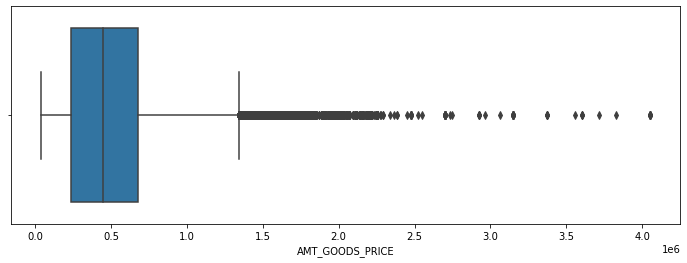

In [14]:
plt.figure(figsize=(12,4))
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

 'AMT_GOODS_PRICE' there is significant number of outlier present in the data. SO data should be imputed with median value: 450000

In [15]:
# identify maximum frequency values
print('Maximum Frequncy categorical values are,')
print('NAME_TYPE_SUITE: ',application_data['NAME_TYPE_SUITE'].mode()[0])
print('OBS_30_CNT_SOCIAL_CIRCLE:', application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', application_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', application_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

Maximum Frequncy categorical values are,
NAME_TYPE_SUITE:  Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


For categorical vriable the value which should be imputed with maximum in frequency.
So the value to be imputed are:
NAME_TYPE_SUITE: Unaccompanied
OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0

In [16]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

In [17]:
# Remove unwanted columns from application dataset for better analysis.

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_PHONE','REGION_RATING_CLIENT','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_10',
         'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_20',
         'FLAG_DOCUMENT_21','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE',
         'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','EMERGENCYSTATE_MODE','EXT_SOURCE_2']

application_data.drop(labels=unwanted,axis=1,inplace=True)

KeyError: "['FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_PHONE'\n 'REGION_RATING_CLIENT' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'\n 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_6'\n 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'\n 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_14' 'FLAG_DOCUMENT_15'\n 'FLAG_DOCUMENT_17' 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_20'\n 'FLAG_DOCUMENT_21' 'YEARS_BEGINEXPLUATATION_AVG'\n 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BEGINEXPLUATATION_MEDI'\n 'FLOORSMAX_MEDI' 'EMERGENCYSTATE_MODE' 'EXT_SOURCE_2'] not found in axis"

In [18]:
application_data.shape

(307507, 44)

In [19]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns

In [20]:
# For Organization column
print('No of XNA values: ', application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape[0])

XNA_count = application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(application_data.index)*100,3)

print('% of XNA Values:',  per_XNA)
application_data['ORGANIZATION_TYPE'].describe()

No of XNA values:  55374
% of XNA Values: 18.007


count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [21]:
# Dropping the XNA value in column 'CODE_GENDER' with "F" for the dataset

application_data = application_data.drop(application_data.loc[application_data['CODE_GENDER']=='XNA'].index)
application_data[application_data['CODE_GENDER']=='XNA'].shape

(0, 44)

In [22]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

In [23]:
# Casting variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

application_data[numeric_columns]=application_data[numeric_columns].apply(pd.to_numeric)
application_data.head(5)

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

Following age/days columns are having negative value, which needs to converted to positive value.
'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'

In [24]:
# Converting 'negative' values into 'positive' Values
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].abs()
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].abs()
application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].abs()
application_data['DAYS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'].abs()
application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [25]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

In [26]:
#application_data.to_csv('ApplicationData.csv')

# Application_Data EDA

In [27]:
defaulters=application_data[application_data.TARGET==1]

nondefaulters=application_data[application_data.TARGET==0]

In [28]:
## FUNCTION TO PLOT CHARTS
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

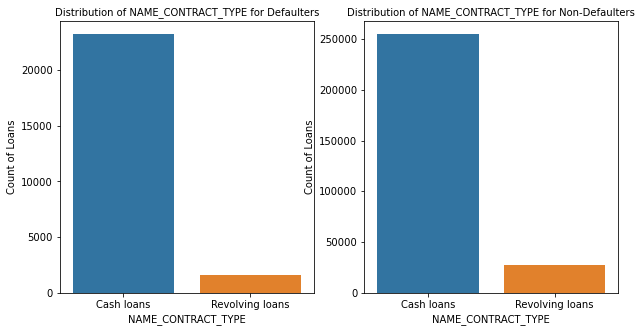

In [29]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

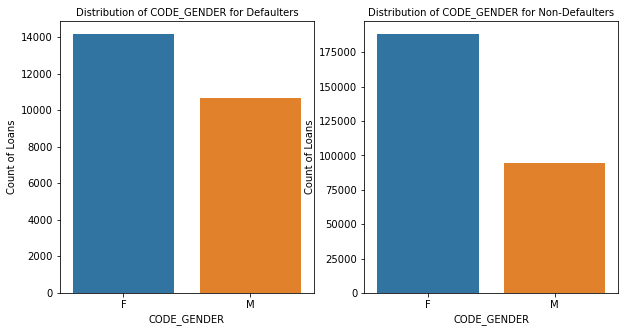

In [30]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1

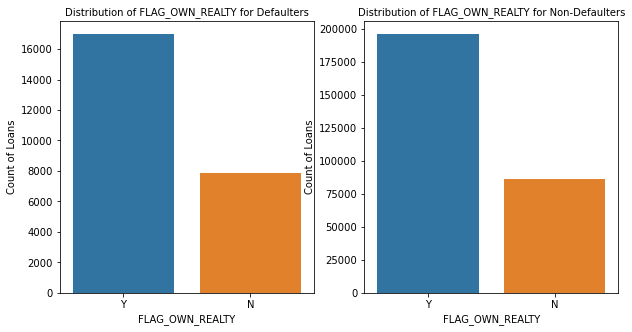

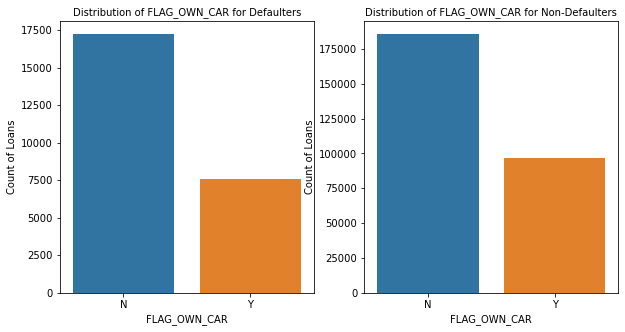

In [31]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

We observe that the number of most people applying for loan do not own a car.
We also observe that the ratio of people who own a car is higher for non-defaulters

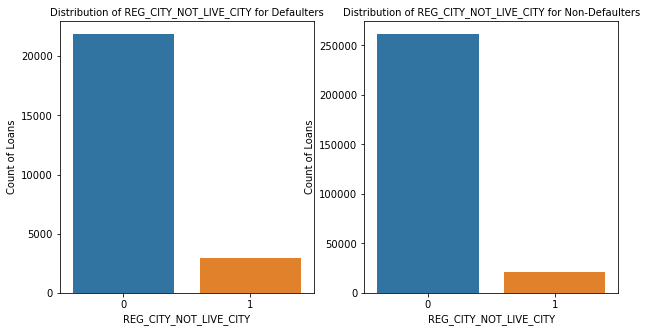

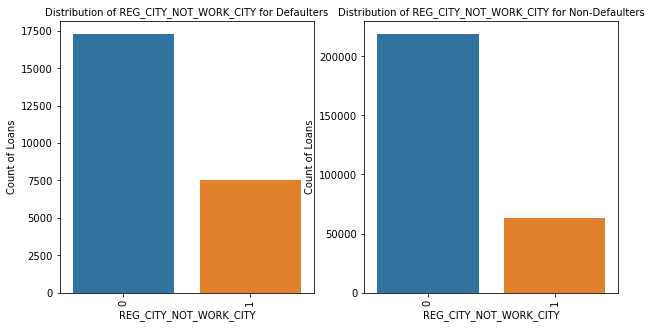

In [32]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

It tells us that people who live or work in a city different than the registration city are more likely to have payment difficulties.

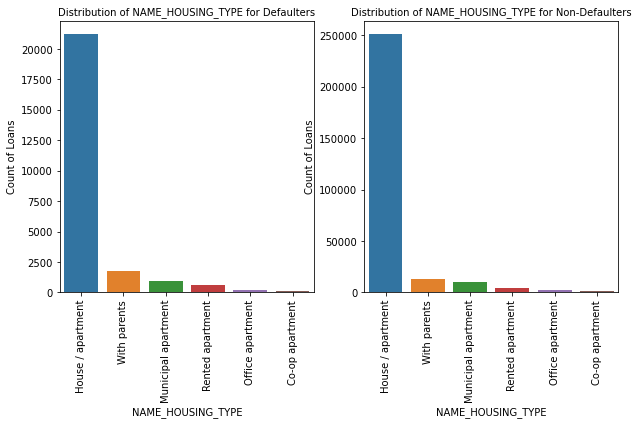

In [33]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

Most people live in a House/Apartment
Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.

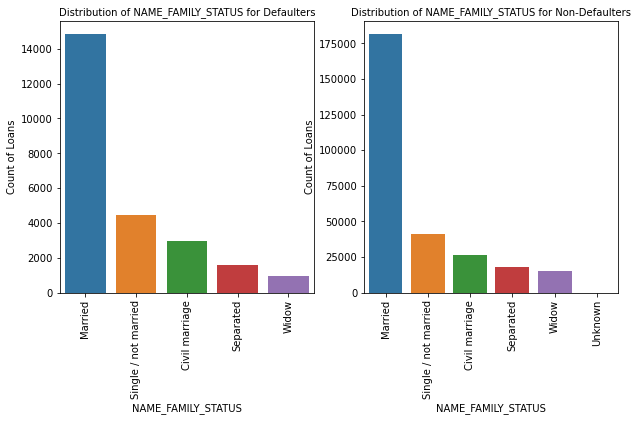

In [34]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

Single/Unmarried people are more likely to have payment difficulties

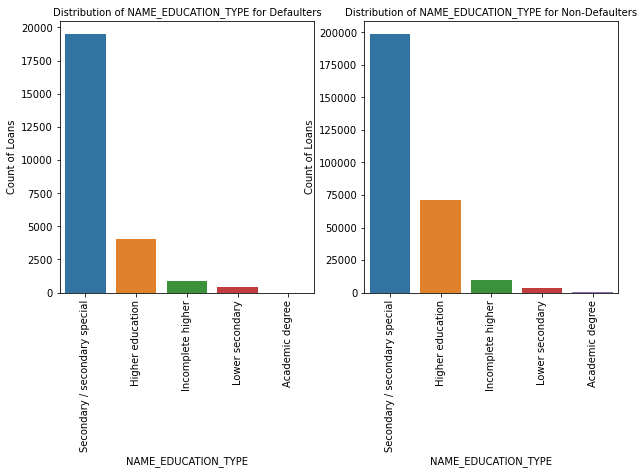

In [35]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.
People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

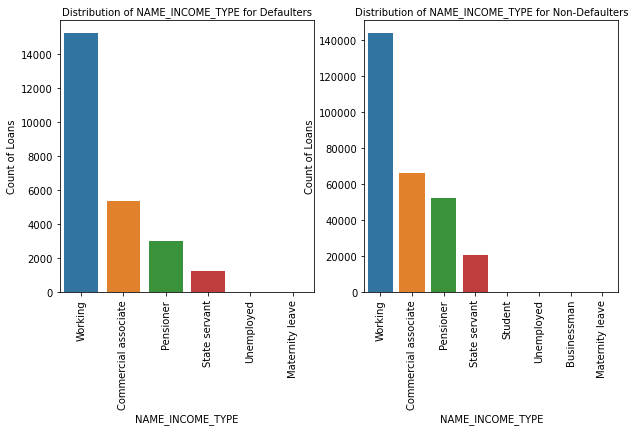

In [36]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.

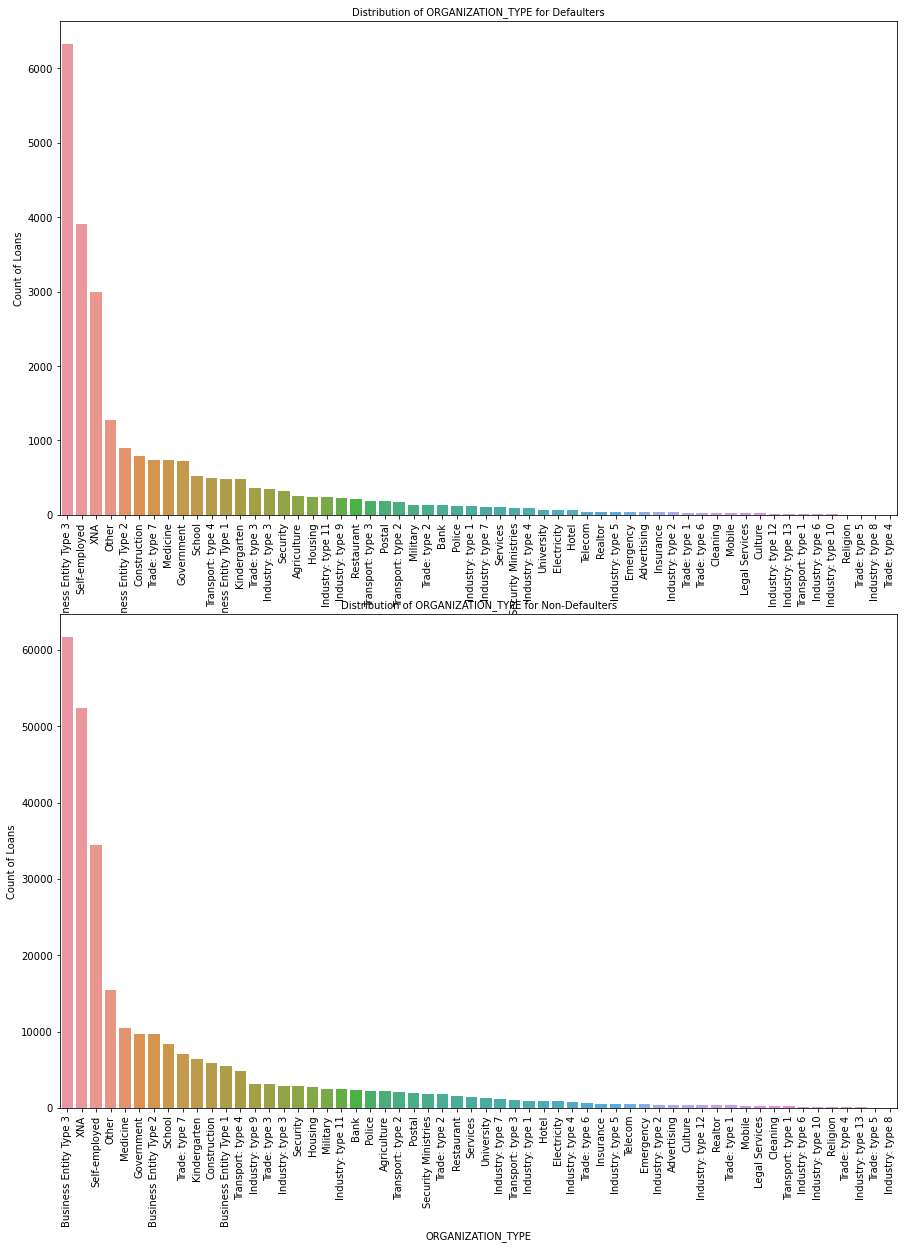

In [37]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

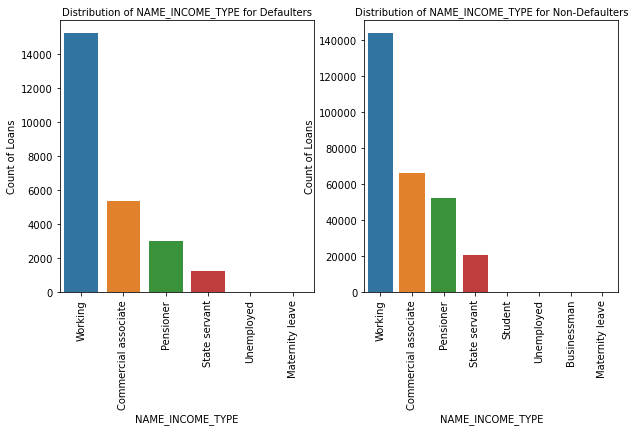

In [38]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

In [39]:
#Univariate & Bivariate Analyis on Numeric Columns
#Getting a list of columns with dtype='float64','INT64', to identify columns for analysis

In [40]:
application_data.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [41]:
application_data.select_dtypes('int64').columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SK_ID_CURR', 'TARGET', 'CNT_CHILDREN',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [42]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

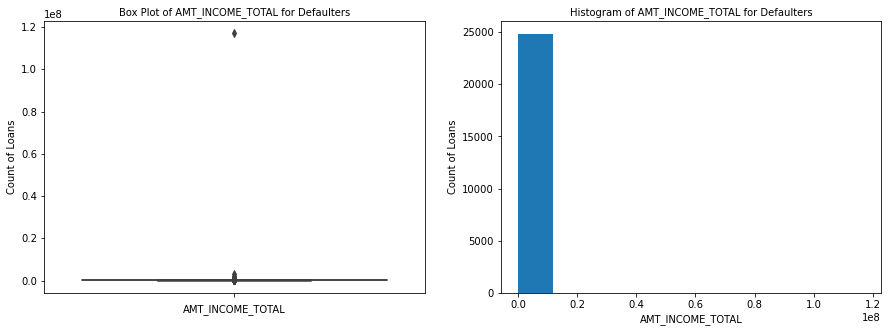

In [43]:
plot_boxhist('AMT_INCOME_TOTAL')

In [44]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

In [45]:
#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

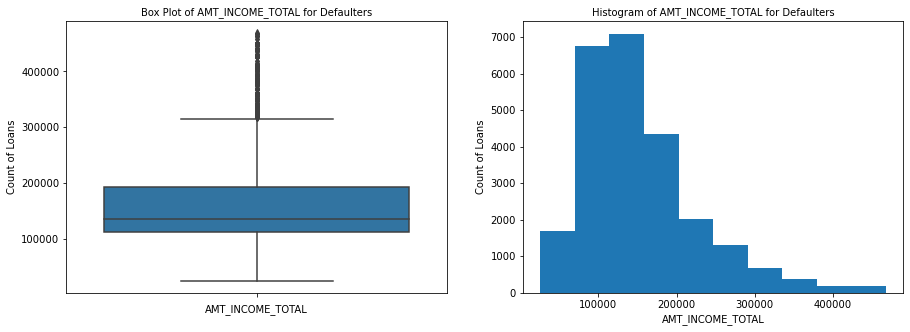

In [46]:

plot_boxhist('AMT_INCOME_TOTAL')

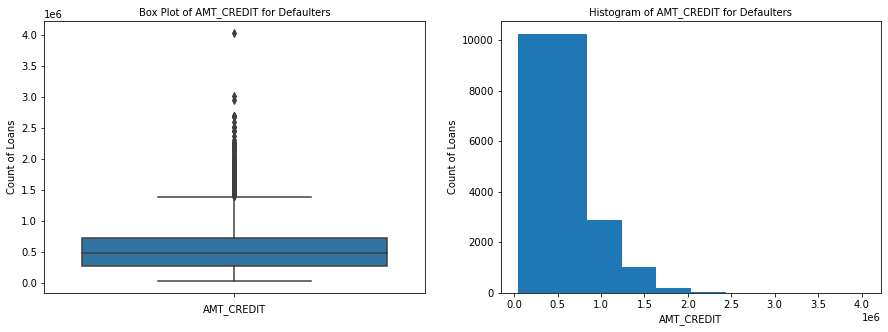

In [47]:
plot_boxhist('AMT_CREDIT')

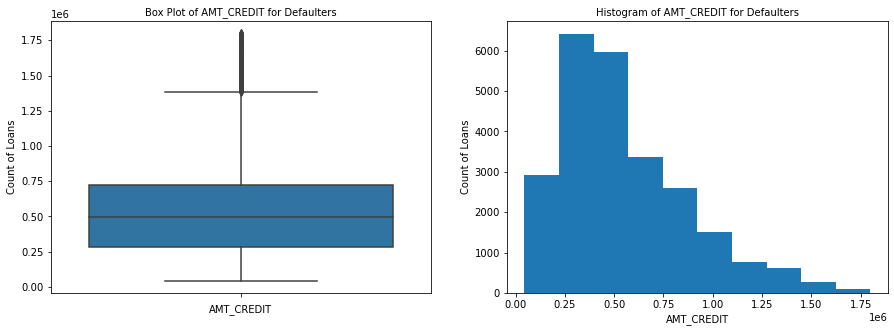

In [48]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_CREDIT<np.nanpercentile(application_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_CREDIT')

The credit amount lies between 250000 to around 500000 for defaulters

In [49]:
#Deriving variable "Years Employed" from days employed
application_data['YEARS_EMPLOYED'] = (application_data['DAYS_EMPLOYED']/365)
#Deriving new metric Age from Days Birth
application_data['AGE'] = application_data['DAYS_BIRTH'] / 365

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

In [50]:
application_data.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'],
                                                    'AGE': ['median']})

YEARS_EMPLOYED                                    \
                               mean       median   count          max   
NAME_INCOME_TYPE                                                        
Businessman                5.272603     4.728767       4     7.175342   
Commercial associate       5.813276     4.126027   68506    48.071233   
Maternity leave            7.224110     8.273973       5    10.306849   
Pensioner               1000.485320  1000.665753   54708  1000.665753   
State servant              9.377421     7.138356   21000    48.172603   
Student                    6.951007     5.273973      17    21.931507   
Unemployed              1000.665753  1000.665753      21  1000.665753   
Working                    6.427642     4.410959  156451    49.073973   

                            AGE  
                         median  
NAME_INCOME_TYPE                 
Businessman           48.639726  
Commercial associate  39.679452  
Maternity leave       39.350685  
Pensioner             60.435616  
State servant         40.601370  
Student               39.224658  
Unemployed            46.832877  
Working               39.821918

We see that Pensioners comprise a lot of non-working people, which is normal. Working people seemed to have worked for many years.

In [51]:
application_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL':
                                                                           ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Commercial associate    239169.230769  225000.0   
                              Pensioner               182196.000000  153900.0   
                              State servant           224250.000000  198000.0   
                              Working                 209183.823529  186750.0   
Higher education              Businessman             258750.000000  202500.0   
                              Commercial associate    213820.432207  202500.0   
                              Maternity leave         195000.000000  135000.0   
                              Pensioner               162787.063239  139500.0   
                              State servant           194286.745503  180000.0   
                              Student                 164700.000000  171000.0   
                              Unemployed              189000.000000  180000.0   
                              Working                 183259.882086  166500.0   
Incomplete higher             Commercial associate    193008.890064  180000.0   
                              Pensioner               147365.129883  135000.0   
                              State servant           171215.048877  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 165714.917152  157500.0   
Lower secondary               Commercial associate    160865.860619  135000.0   
                              Pensioner               105801.431937   90000.0   
                              State servant           138915.000000  114750.0   
                              Working                 138269.781341  130500.0   
Secondary / secondary special Commercial associate    175325.201660  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               129137.684483  112500.0   
                              State servant           156566.425298  135000.0   
                              Student                 138681.818182  144000.0   
                              Unemployed               69150.000000   59625.0   
                              Working                 151015.012874  135000.0   

                                                                      
                                                     count       max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate      39  450000.0  
                              Pensioner                 25  450000.0  
                              State servant             18  450000.0  
                              Working                   68  450000.0  
Higher education              Businessman                4  450000.0  
                              Commercial associate   21992  468000.0  
                              Maternity leave            3  360000.0  
                              Pensioner               7913  450000.0  
                              State servant           8372  463500.0  
                              Student                    5  225000.0  
                              Unemployed                 6  337500.0  
                              Working                32587  463500.0  
Incomplete higher             Commercial associate    3261  468823.5  
                              Pensioner                512  450000.0  
                              State servant            757  450000.0  
                              Student                    1  157500.0  
                              Unemployed                 3  270000.0  
                              Working 

We can see that most of the loans are taken by working people with secondary education.

In [52]:
age_group = application_data.loc[:,['TARGET', 'DAYS_BIRTH']]
age_group.loc[:,'YEARS_BIRTH'] = application_data.loc[:,'DAYS_BIRTH']/ 365
# Bin the age data
age_group.loc[:,'YEARS_BINNED'] = pd.cut(age_group.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_group.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [53]:
age_groups  = age_group.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123594   8531.928772    23.375147
(25.0, 30.0]  0.112278  10154.485324    27.820508
(30.0, 35.0]  0.103947  11853.815741    32.476208
(35.0, 40.0]  0.090626  13707.542775    37.554912
(40.0, 45.0]  0.079195  15497.403188    42.458639
(45.0, 50.0]  0.074977  17324.753720    47.465079
(50.0, 55.0]  0.067691  19197.547016    52.596019
(55.0, 60.0]  0.055751  20985.155108    57.493576
(60.0, 65.0]  0.052873  22781.726318    62.415689
(65.0, 70.0]  0.037335  24292.989863    66.556137

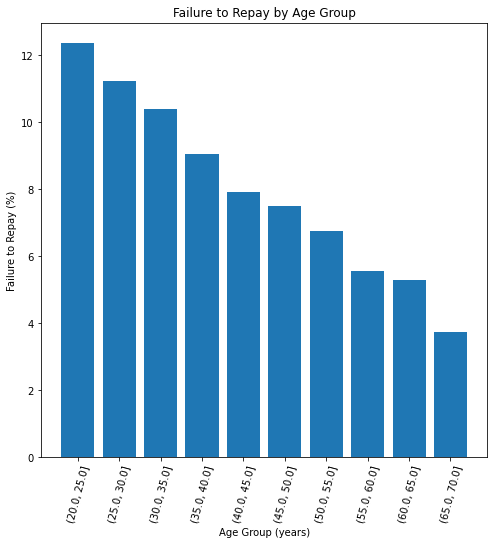

In [54]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
plt.savefig('age_group.png')

Bi-Variate Analysis of Variables

In [55]:
application_data.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           2             2      100004       0    Revolving loans   
3           3             3      100006       0         Cash loans   
4           4             4      100007       0         Cash loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           M            Y               Y             0           67500.0   
3           F            N               Y             0          135000.0   
4           M            N               Y             0          121500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    406597.5      24700.5         351000.0   Unaccompanied          Working   
1   1293502.5      35698.5        1129500.0          Family    State servant   
2    135000.0       6750.0         135000.0   Unaccompanied          Working   
3    312682.5      29686.5         297000.0   Unaccompanied          Working   
4    513000.0      21865.5         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2             2531        Laborers                     MONDAY   
3             2437        Laborers                  WEDNESDAY   
4             3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      

In [56]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300712 entries, 0 to 307506
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   300712 non-null  int64  
 1   Unnamed: 0.1                 300712 non-null  int64  
 2   SK_ID_CURR                   300712 non-null  int64  
 3   TARGET                       300712 non-null  int64  
 4   NAME_CONTRACT_TYPE           300712 non-null  object 
 5   CODE_GENDER                  300712 non-null  object 
 6   FLAG_OWN_CAR                 300712 non-null  object 
 7   FLAG_OWN_REALTY              300712 non-null  object 
 8   CNT_CHILDREN                 300712 non-null  int64  
 9   AMT_INCOME_TOTAL             300712 non-null  float64
 10  AMT_CREDIT                   300712 non-null  float64
 11  AMT_ANNUITY                  300700 non-null  float64
 12  AMT_GOODS_PRICE              300436 non-null  float64
 13 

In [57]:
#selecting columns for correlation, removing cols for floor and house ec

cols=[ 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
      'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [58]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

AMT_GOODS_PRICE  AMT_ANNUITY  \
AMT_GOODS_PRICE                       1.000        0.738   
AMT_ANNUITY                           0.738        1.000   
DAYS_LAST_PHONE_CHANGE                0.118        0.075   
AMT_CREDIT                            0.981        0.737   
AMT_INCOME_TOTAL                      0.335        0.416   
DAYS_REGISTRATION                     0.030       -0.033   
REGION_POPULATION_RELATIVE            0.075        0.066   
CNT_CHILDREN                         -0.005        0.034   
HOUR_APPR_PROCESS_START               0.041        0.028   
DAYS_ID_PUBLISH                       0.056        0.014   
DAYS_EMPLOYED                         0.012       -0.081   
DAYS_BIRTH                            0.136        0.008   

                            DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  \
AMT_GOODS_PRICE                              0.118       0.981   
AMT_ANNUITY                                  0.075       0.737   
DAYS_LAST_PHONE_CHANGE                       1.000       0.109   
AMT_CREDIT                                   0.109       1.000   
AMT_INCOME_TOTAL                             0.084       0.333   
DAYS_REGISTRATION                            0.070       0.030   
REGION_POPULATION_RELATIVE                   0.055       0.067   
CNT_CHILDREN                                -0.010       0.002   
HOUR_APPR_PROCESS_START                      0.022       0.028   
DAYS_ID_PUBLISH                              0.125       0.052   
DAYS_EMPLOYED                                0.001       0.007   
DAYS_BIRTH                                   0.110       0.135   

                            AMT_INCOME_TOTAL  DAYS_REGISTRATION  \
AMT_GOODS_PRICE                        0.335              0.030   
AMT_ANNUITY                            0.416             -0.033   
DAYS_LAST_PHONE_CHANGE                 0.084              0.070   
AMT_CREDIT                             0.333              0.030   
AMT_INCOME_TOTAL                       1.000             -0.036   
DAYS_REGISTRATION                     -0.036              1.000   
REGION_POPULATION_RELATIVE             0.111              0.056   
CNT_CHILDREN                          -0.001             -0.149   
HOUR_APPR_PROCESS_START                0.079              0.033   
DAYS_ID_PUBLISH                        0.002              0.097   
DAYS_EMPLOYED                         -0.118              0.193   
DAYS_BIRTH                            -0.005              0.289   

                            REGION_POPULATION_RELATIVE  CNT_CHILDREN  \
AMT_GOODS_PRICE                                  0.075        -0.005   
AMT_ANNUITY                                      0.066         0.034   
DAYS_LAST_PHONE_CHANGE                           0.055        -0.010   
AMT_CREDIT                                       0.067         0.002   
AMT_INCOME_TOTAL                                 0.111        -0.001   
DAYS_REGISTRATION                                0.056        -0.149   
REGION_POPULATION_RELATIVE                       1.000        -0.032   
CNT_CHILDREN                                    -0.032         1.000   
HOUR_APPR_PROCESS_START                          0.142        -0.023   
DAYS_ID_PUBLISH                                  0.015         0.031   
DAYS_EMPLOYED                                    0.015        -0.194   
DAYS_BIRTH                                       0.048        -0.260   

                            HOUR_APPR_PROCESS_START  DAYS_ID_PUBLISH  \
AMT_GOODS_PRICE                               0.041            0.056   
AMT_ANNUITY                                   0.028            0.014   
DAYS_LAST_PHONE_CHANGE                        0.022            0.125   
AMT_CREDIT                                    0.028            0.052   
AMT_INCOME_TOTAL                              0.079            0.002   
DAYS_REGISTRATION                             0.033            0.097   
REGION_POPULATION_RELATIVE                    0.142            0.015   
CNT

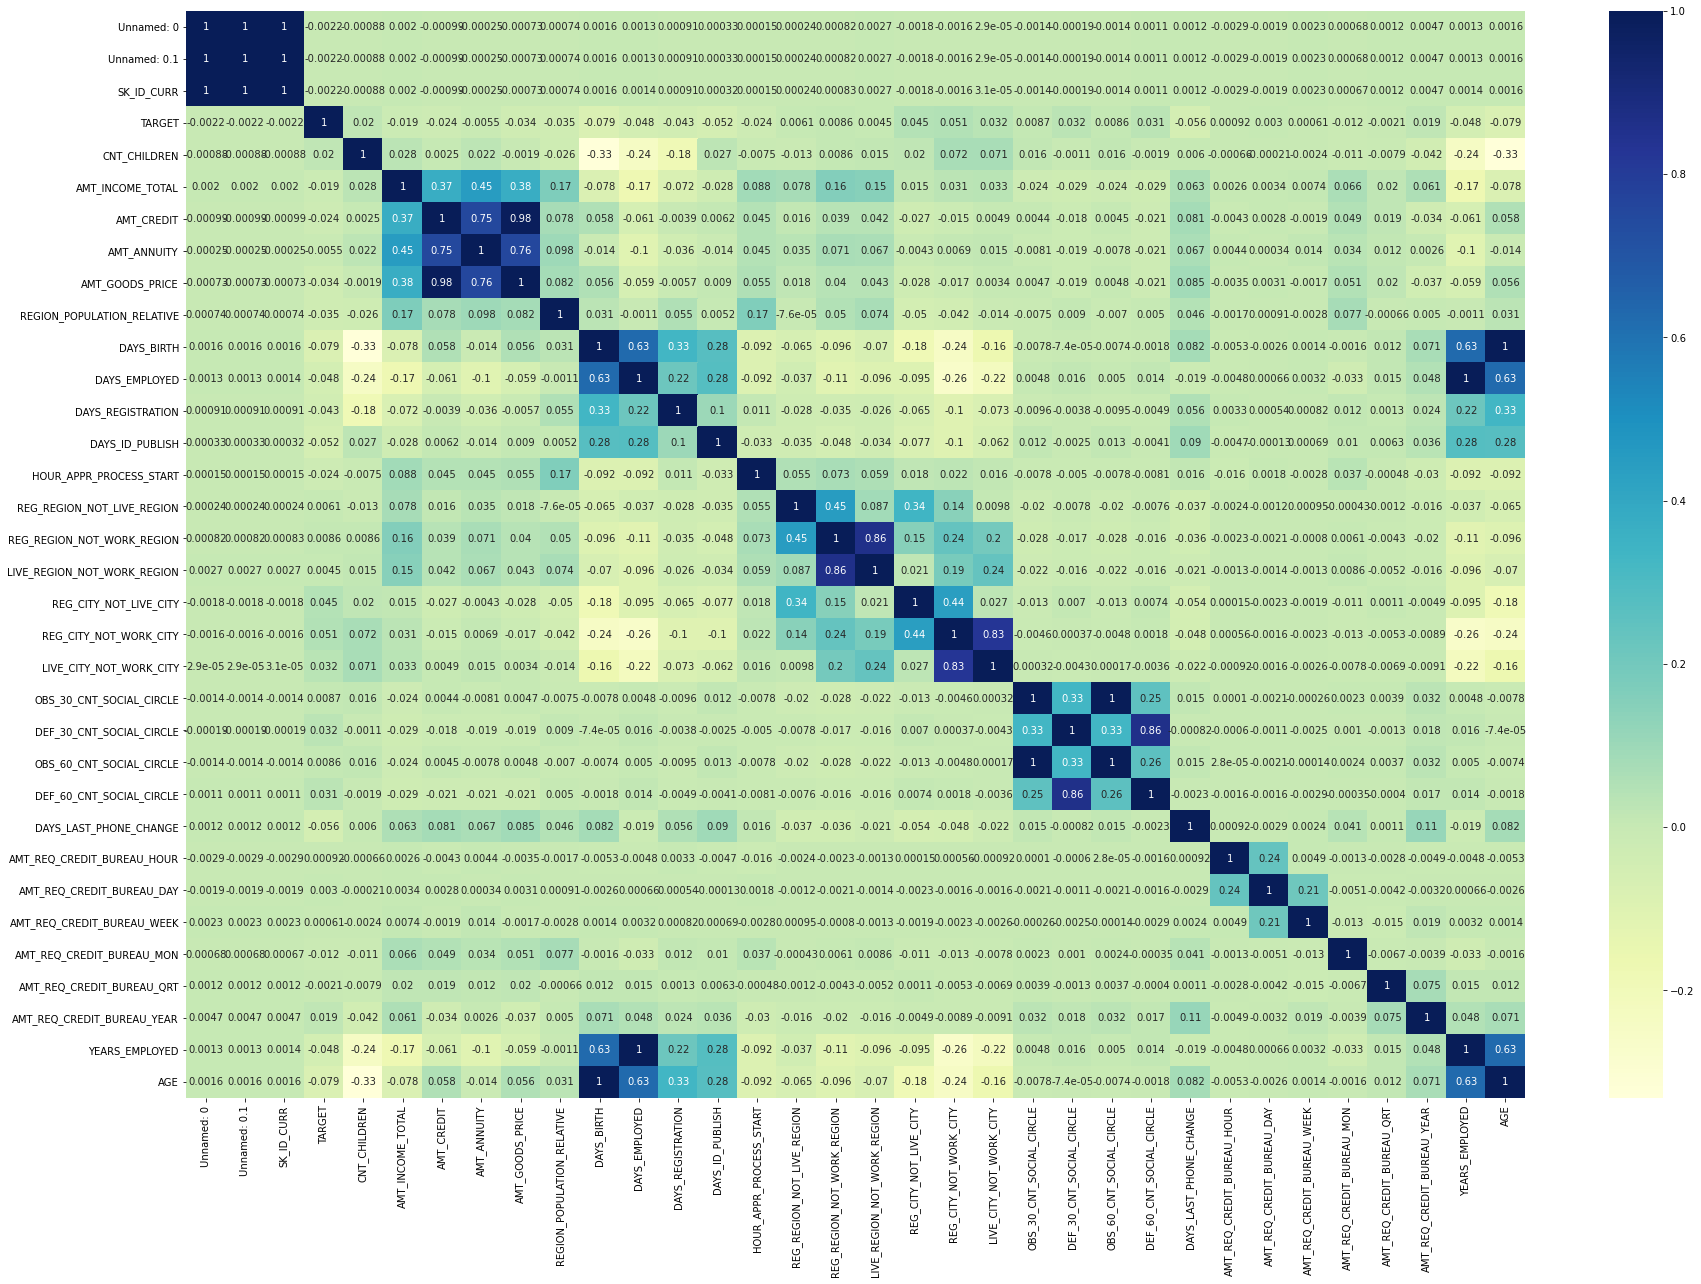

In [59]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(application_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

 most positive correlations
AMT_CREDIT - AMT_GOODS_PRICE
CNT_CHILDREN - CNT_FAM_MEMBERS
AMT_CREDIT - AMT_ANNUITY
AMT_GOODS_PRICE - AMT_ANNUITY
DAYS_EMPLOYED -DAYS_BIRTH

most negative correlations
HOUR_APPR_PROCESS_START - CNT_CHILDREN
REGION_POPULATION_RELATIVE - AMT_GOOD_PRICE
 REGION_POPULATION_RELATIVE- DAYS_BIRTH

# previous_application

In [60]:
#reading the previous application file
previous_data=pd.read_csv('previous_application.csv') #PREVIOUS APPLICATION data set

In [61]:
#checking the data
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [62]:
previous_data.shape

(1670214, 37)

In [63]:
#checking the % of null values so that we can look at what attributes will drop!
print(round(100*(previous_data.isnull().sum()/len(previous_data))))

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [64]:
new_previous_data = previous_data.dropna(axis=1)
new_previous_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
0     2030495      271877     Consumer loans          17145.0   
1     2802425      108129         Cash loans         607500.0   
2     2523466      122040         Cash loans         112500.0   
3     2819243      176158         Cash loans         450000.0   
4     1784265      202054         Cash loans         337500.0   
5     1383531      199383         Cash loans         315000.0   
6     2315218      175704         Cash loans              0.0   
7     1656711      296299         Cash loans              0.0   
8     2367563      342292         Cash loans              0.0   
9     2579447      334349         Cash loans              0.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   
5                   SATURDAY                        8   
6                    TUESDAY                       11   
7                     MONDAY                        7   
8                     MONDAY                       15   
9                   SATURDAY                       15   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   
5                           Y                       1      Everyday expenses   
6                           Y                       1                    XNA   
7                           Y                       1                    XNA   
8                           Y                       1                    XNA   
9                           Y                       1                    XNA   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   
5             Approved           -684  Cash through the bank   
6             Canceled            -14                    XNA   
7             Canceled            -21                    XNA   
8             Canceled           -386                    XNA   
9             Canceled            -57                    XNA   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   
5                XAP         Repeater                 XNA           Cash   
6                XAP         Repeater                 XNA            XNA   
7                XAP         Repeater                 XNA            XNA   
8                XAP         Repeater                 XNA            XNA   
9                XAP         Repeater                 XNA            XNA   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash o

In [65]:
print(round(100*(new_previous_data.isnull().sum()/len(new_previous_data))))

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64


In [66]:
new_previous_data.shape

(1670214, 21)

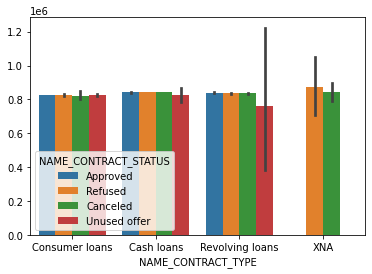

In [67]:
# looking at the number of requests recived for each Contract type and how much of them have been passed/rejected/unused or cancelled.
sns.barplot(x = 'NAME_CONTRACT_TYPE' , y=new_previous_data.index,hue = 'NAME_CONTRACT_STATUS',data = new_previous_data)


we see that for cash Loans, we have a better performance in accepting the loan but on the same time, more number of loans have been cancelled by the user. Whereas if we look at Revolving Loans, we can see that there is a huge variation in the Unused offer section.

Let's try to find the outliers if any in the process.

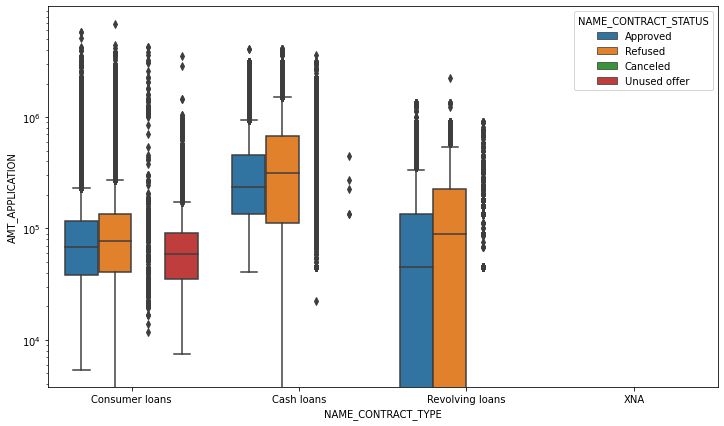

In [68]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',data = new_previous_data)
ax.set_yscale('log')

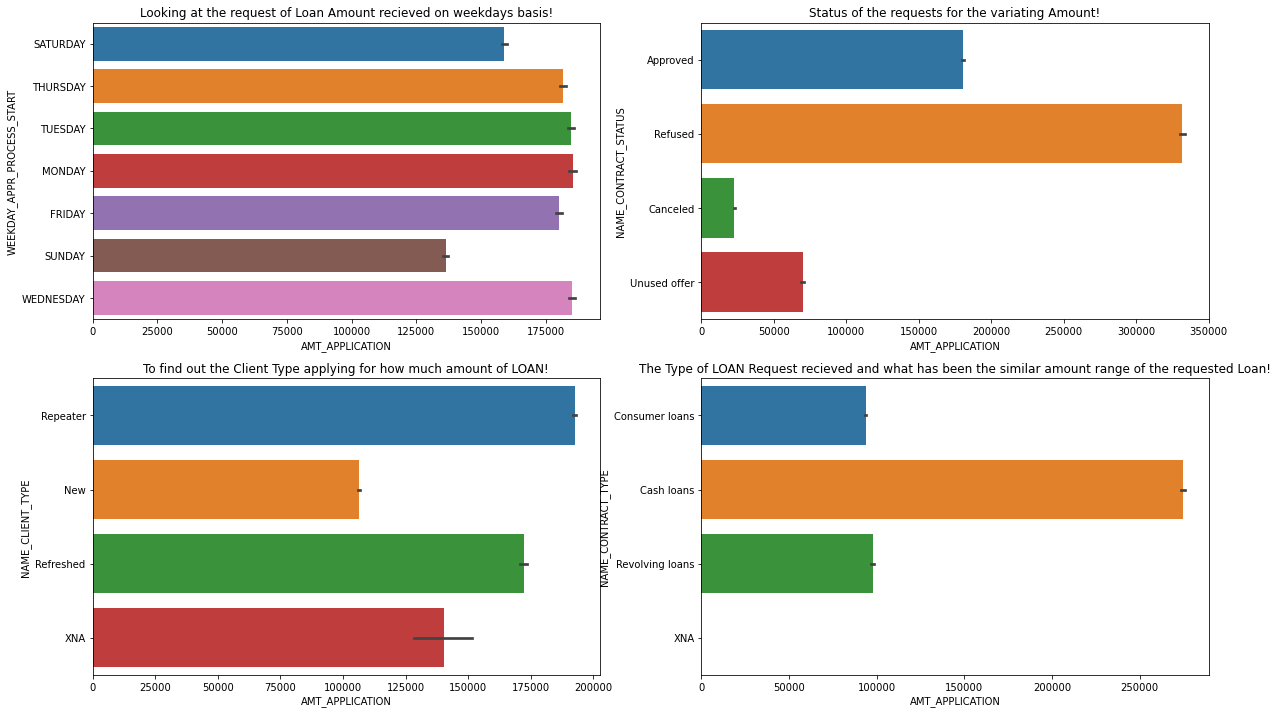

In [69]:
# Next step is to remove the outliers, but before that, let's explore more attributes.
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plot_amount_weekday = sns.barplot(x = 'AMT_APPLICATION' , y = 'WEEKDAY_APPR_PROCESS_START',data = new_previous_data)
plt.title('Looking at the request of Loan Amount recieved on weekdays basis!')
plt.subplot(2,2,2)
plot_amount_status = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CONTRACT_STATUS',data =  new_previous_data)
plt.title('Status of the requests for the variating Amount!')
plt.subplot(2,2,3)
plot_amount_client_type = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CLIENT_TYPE',data =  new_previous_data)
plt.title('To find out the Client Type applying for how much amount of LOAN!')
plt.subplot(2,2,4)
plot_amount_contract_type = sns.barplot(x = 'AMT_APPLICATION' , y = 'NAME_CONTRACT_TYPE',data =  new_previous_data)
plt.title('The Type of LOAN Request recieved and what has been the similar amount range of the requested Loan!');

So we get to see that for Large Amount of money, we are getting requests on the First 3 days of the week!.¶
Along with that we can see that the requests between 15 lacs to 25lacs are usually approved whereas requests around 30 lacs are either rejected or cancelled!
One interesting thing popped is, can we look at the Hour of the Day and find out on which hour, which type of Loan Request has recieved and later on to on which hour what has been status of the requests

In [70]:
new_previous_data.to_csv('PreviousData.csv')

# Looking at the Correlation

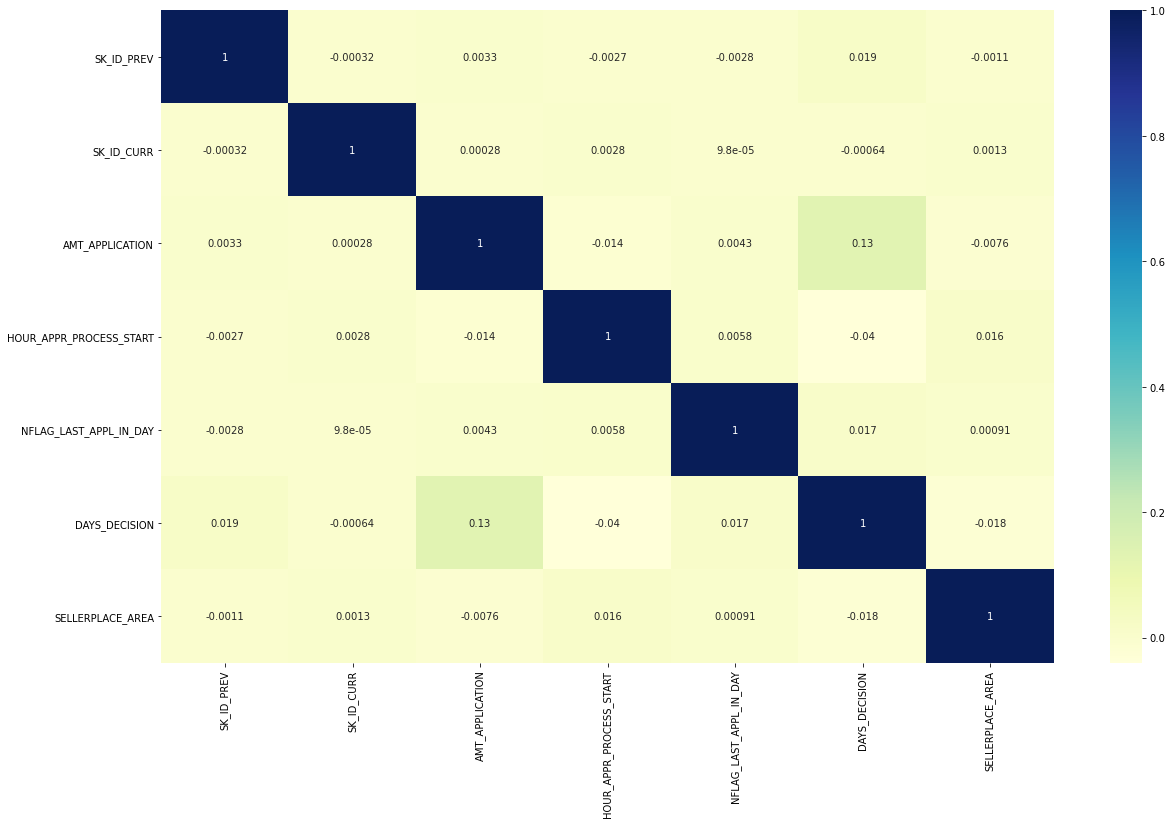

In [71]:
plt.figure(figsize=(20,12))
sns.heatmap(new_previous_data.corr(),cmap='YlGnBu',annot=True);


In [72]:
all_application=pd.merge(left=application_data,right=previous_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [73]:
#cheking the new dataframe
all_application.shape

(1388879, 82)

In [74]:
all_application.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_  \
0           0             0      100002       1          Cash loans   
1           1             1      100003       0          Cash loans   
2           1             1      100003       0          Cash loans   
3           1             1      100003       0          Cash loans   
4           2             2      100004       0     Revolving loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           F            N               N             0          270000.0   
3           F            N               N             0          270000.0   
4           M            Y               Y             0           67500.0   

   AMT_CREDIT_  AMT_ANNUITY_  AMT_GOODS_PRICE_ NAME_TYPE_SUITE_  \
0     406597.5       24700.5          351000.0    Unaccompanied   
1    1293502.5       35698.5         1129500.0           Family   
2    1293502.5       35698.5         1129500.0           Family   
3    1293502.5       35698.5         1129500.0           Family   
4     135000.0        6750.0          135000.0    Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0             3648.0             2120        Laborers   
1             1186.0              291      Core staff   
2             1186.0              291      Core staff   
3             1186.0              291      Core staff   
4             4260.0             2531        Laborers   

  WEEKDAY_APPR_PROCESS_START_  HOUR_APPR_PROCESS_START_  \
0                   WEDNESDAY                        10   
1                      MONDAY                        11   
2                      MONDAY                        11   
3                      MONDAY                        11   
4                      MONDAY                         9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0  

In [75]:
# Renaming the column names after merging from combined df
all_application = all_application.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [76]:
all_application.head()

Unnamed: 0  Unnamed: 0.1  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE  \
0           0             0      100002       1         Cash loans   
1           1             1      100003       0         Cash loans   
2           1             1      100003       0         Cash loans   
3           1             1      100003       0         Cash loans   
4           2             2      100004       0    Revolving loans   

  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           M            N               Y             0          202500.0   
1           F            N               N             0          270000.0   
2           F            N               N             0          270000.0   
3           F            N               N             0          270000.0   
4           M            Y               Y             0           67500.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE_ NAME_TYPE_SUITE_  \
0    406597.5      24700.5          351000.0    Unaccompanied   
1   1293502.5      35698.5         1129500.0           Family   
2   1293502.5      35698.5         1129500.0           Family   
3   1293502.5      35698.5         1129500.0           Family   
4    135000.0       6750.0          135000.0    Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0             3648.0             2120        Laborers   
1             1186.0              291      Core staff   
2             1186.0              291      Core staff   
3             1186.0              291      Core staff   
4             4260.0             2531        Laborers   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4   

In [77]:
# Removing unwanted columns from cmbined df for analysis
all_application.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

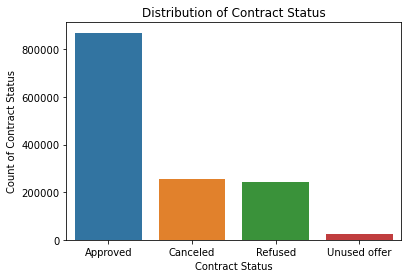

In [78]:
sns.countplot(all_application['NAME_CONTRACT_STATUS'])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

dividing the all_application data into 4 parts based on the contract status, i.e: Approved, refused, canceled, unused

In [79]:
approved_df = all_application[all_application['NAME_CONTRACT_STATUS']=='Approved']
refused_df = all_application[all_application['NAME_CONTRACT_STATUS']=='Refused']
canceled_df = all_application[all_application['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = all_application[all_application['NAME_CONTRACT_STATUS']=='Unused offer']

In [80]:
all_application['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         1283244
Revolving loans     105635
Name: NAME_CONTRACT_TYPE, dtype: int64

In [81]:
def multi_plot(variable_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,12), sharey='all')
    fig.tight_layout(pad=10.0)

    ax1 = sns.countplot(ax=ax1,data=approved_df,x=variable_name)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_ylabel("Number of Loans",fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90,fontsize=12)

    ax2 = sns.countplot(ax=ax2,data=refused_df,x=variable_name)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_ylabel("Number of Loans",fontsize=14)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,fontsize=12)
    
    ax3 = sns.countplot(ax=ax3,data=canceled_df,x=variable_name)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel(variable_name)
    ax3.set_ylabel("Number of Loans",fontsize=14)
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90,fontsize=12)

    ax4 = sns.countplot(ax=ax4,data=unused_df,x=variable_name)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel(variable_name)
    ax4.set_ylabel("Number of Loans",fontsize=14)
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90,fontsize=12)
    
    plt.show()

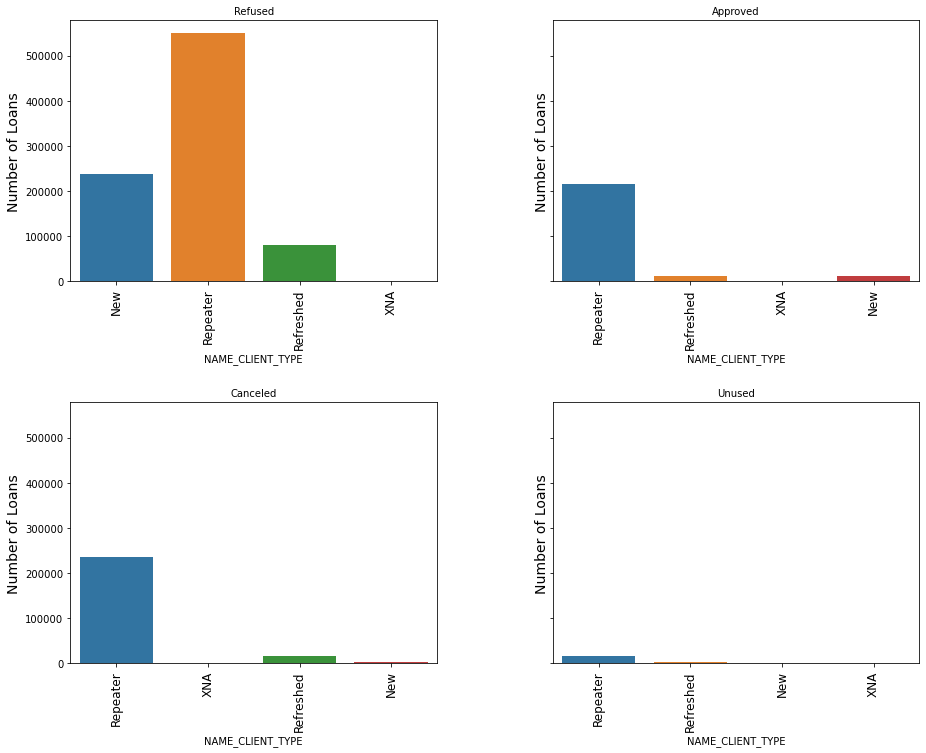

In [82]:
multi_plot('NAME_CLIENT_TYPE')

the Repeater is getting more Refused but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.

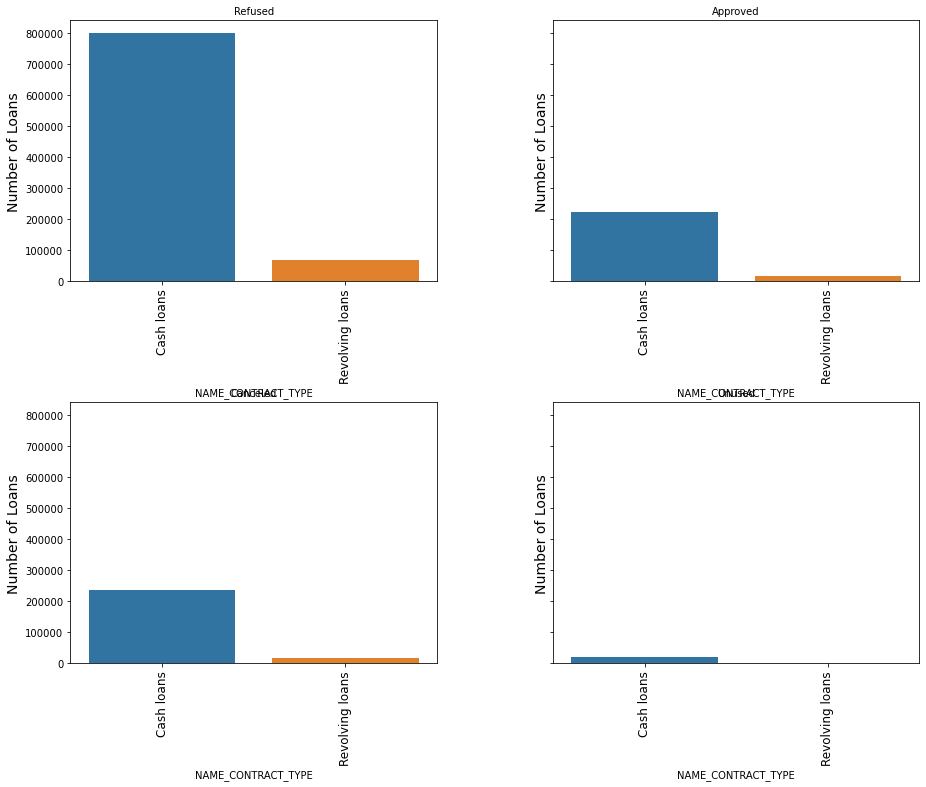

In [83]:
multi_plot('NAME_CONTRACT_TYPE')

the Revolving loan is much more acceptable as compare to the cash and consumer loans.

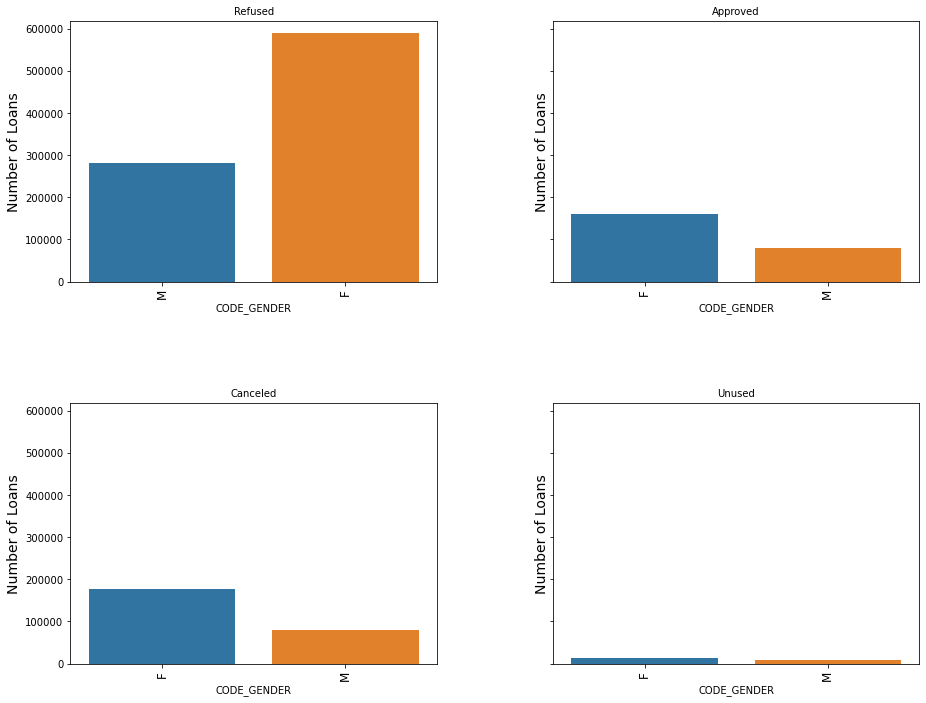

In [84]:
multi_plot('CODE_GENDER')

Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category.

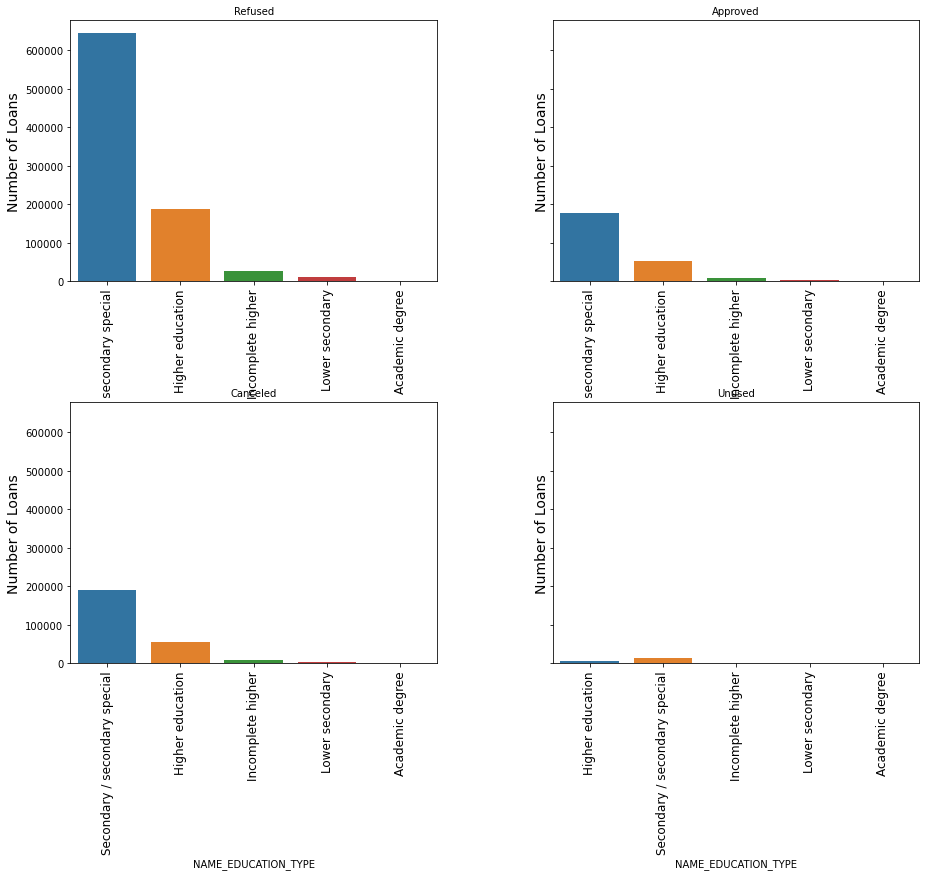

In [85]:
multi_plot('NAME_EDUCATION_TYPE')

 we can see that Secondary/ Secondary special is more effective in every case

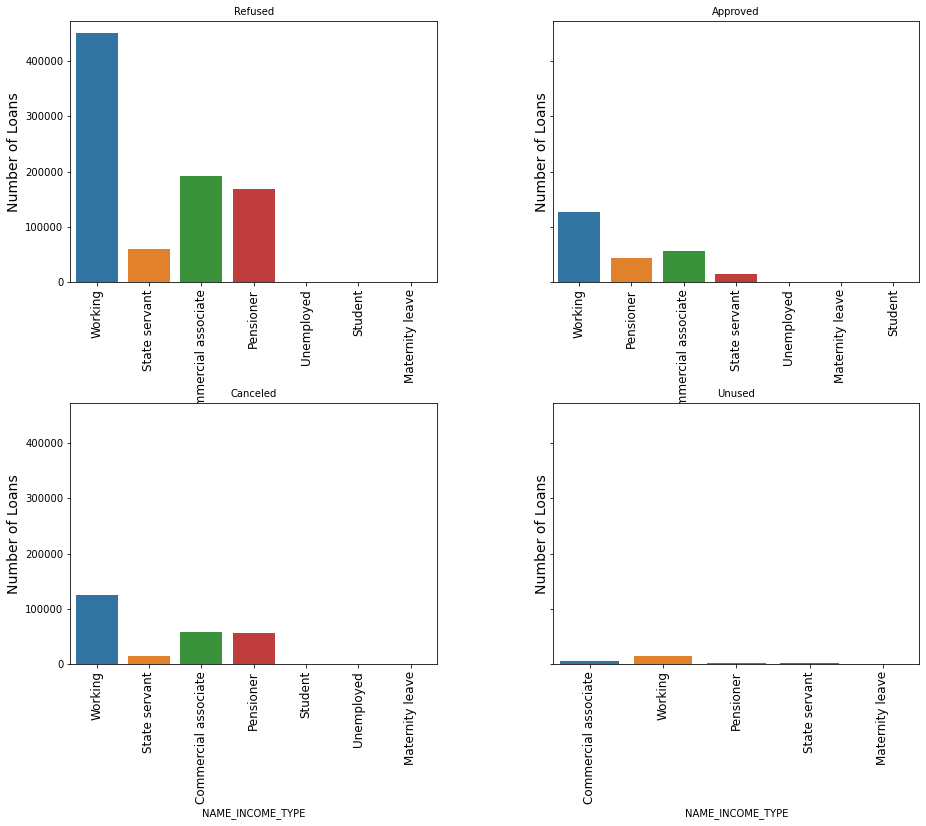

In [86]:
multi_plot('NAME_INCOME_TYPE')

the working type people are applying more loans as compare to others and also Commercial associates people are taking more loans.

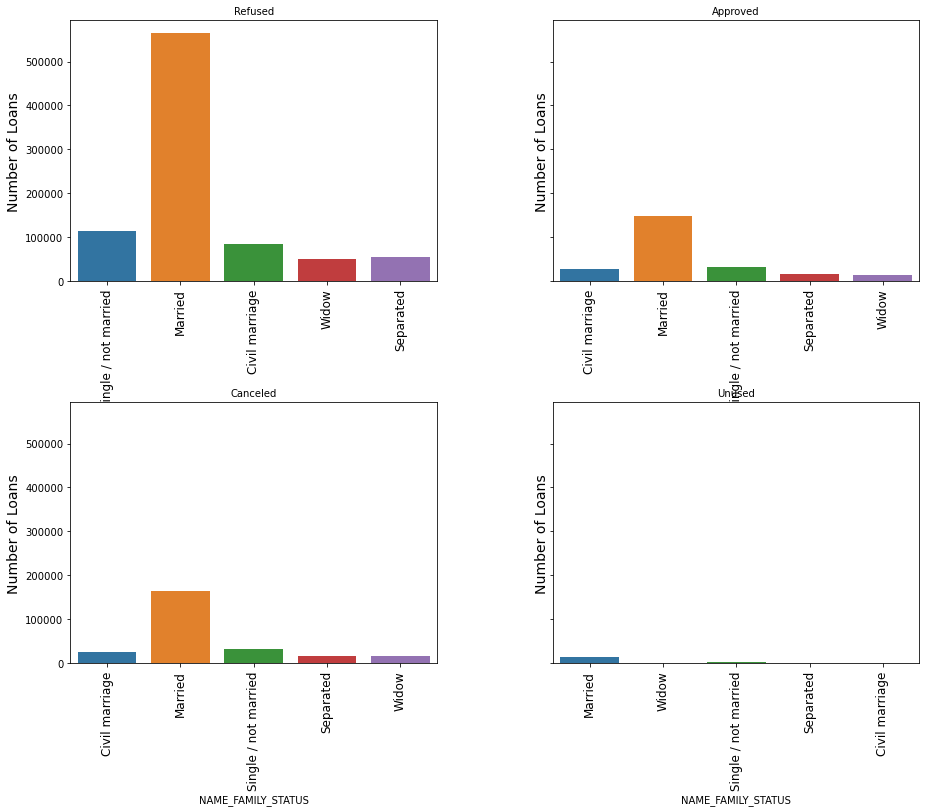

In [87]:
multi_plot('NAME_FAMILY_STATUS')

The Married people are applying and taking loans more than the others.

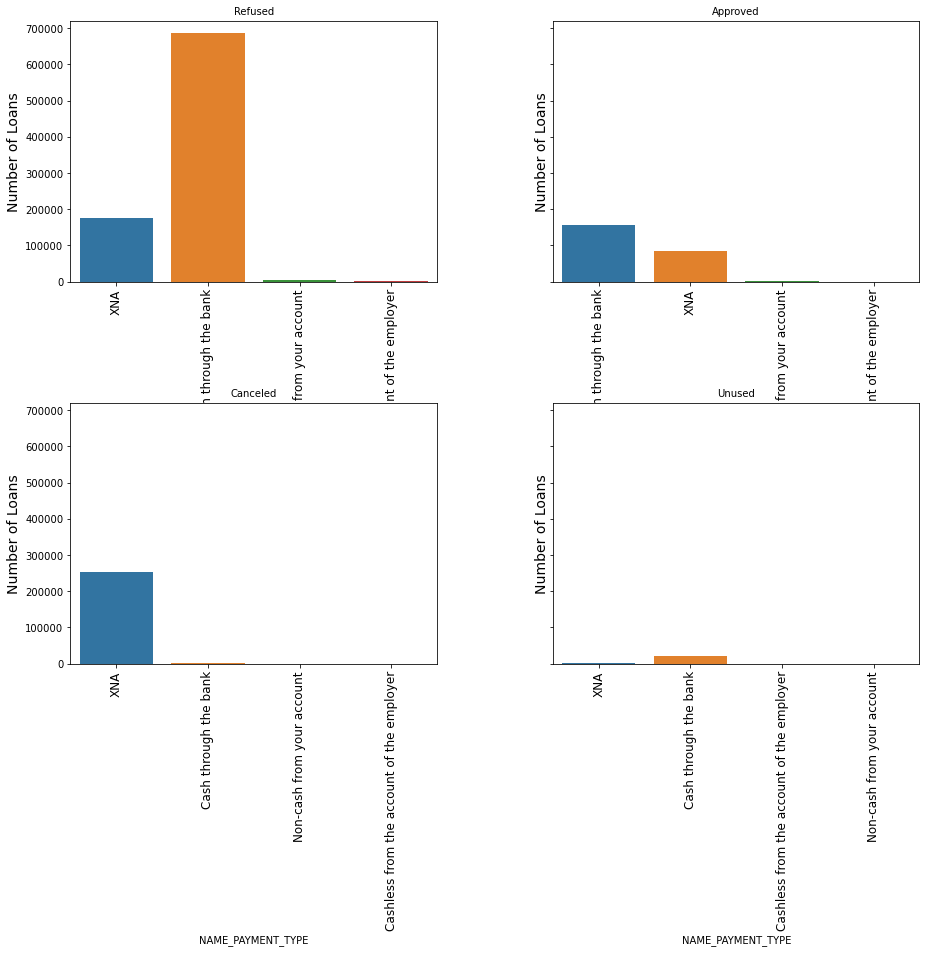

In [88]:
multi_plot('NAME_PAYMENT_TYPE')

the people are taking more loan in format of cash through the bank.

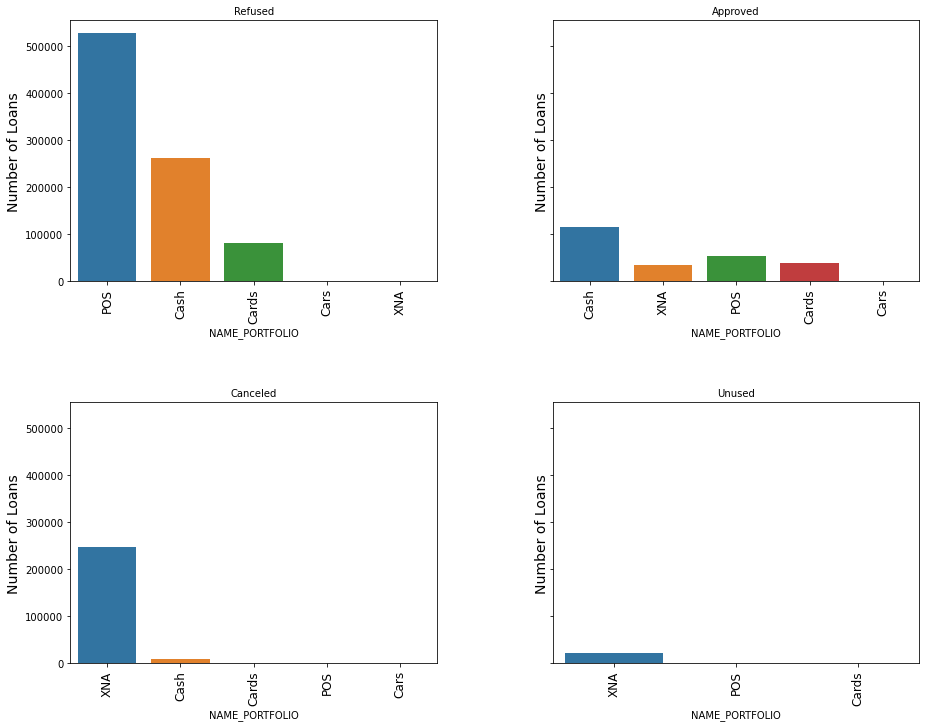

In [89]:
multi_plot('NAME_PORTFOLIO')

most approved loan were through POS and Most refused loans were in cash.

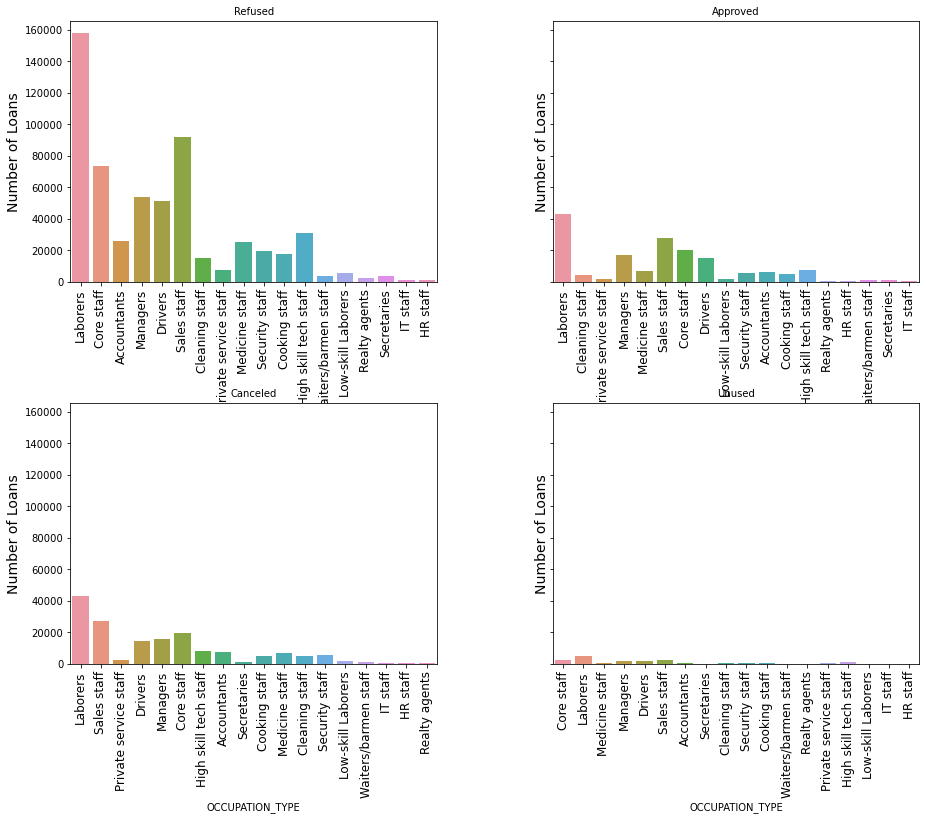

In [90]:
multi_plot('OCCUPATION_TYPE')

laborers are getting most refused and most approved loans. And aslo Sales staff is also getting the second most refused and approved loans.

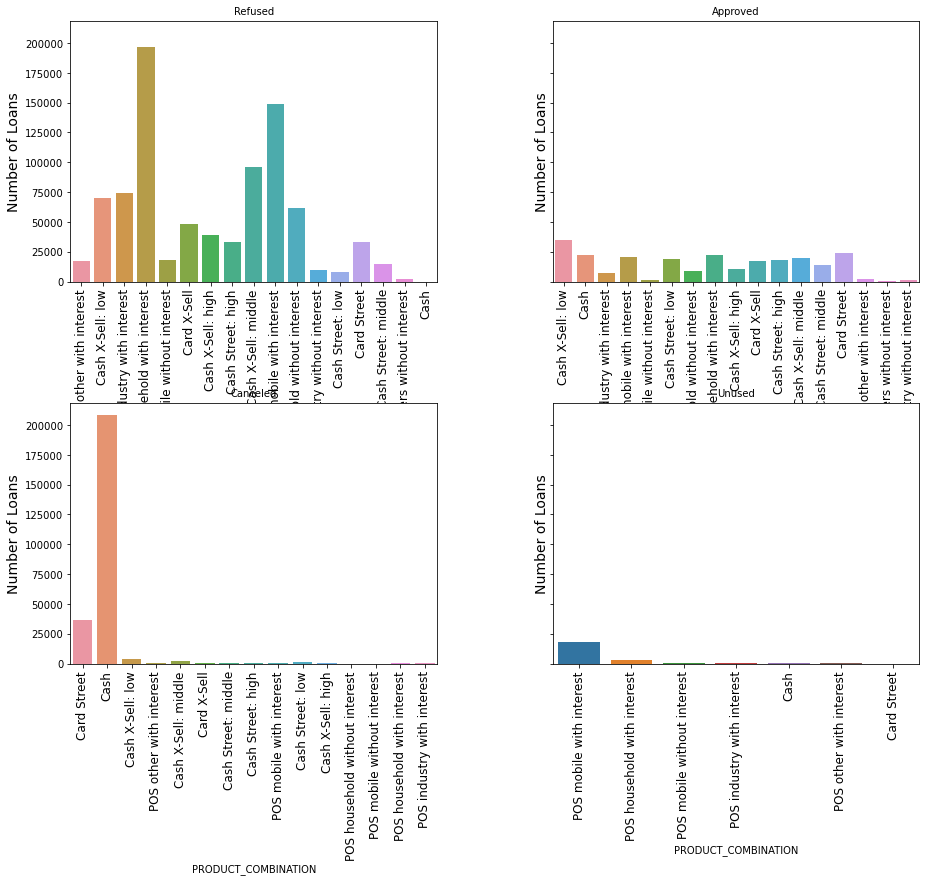

In [91]:
multi_plot('PRODUCT_COMBINATION')

The most accepting loan is Cash X-sell: low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.

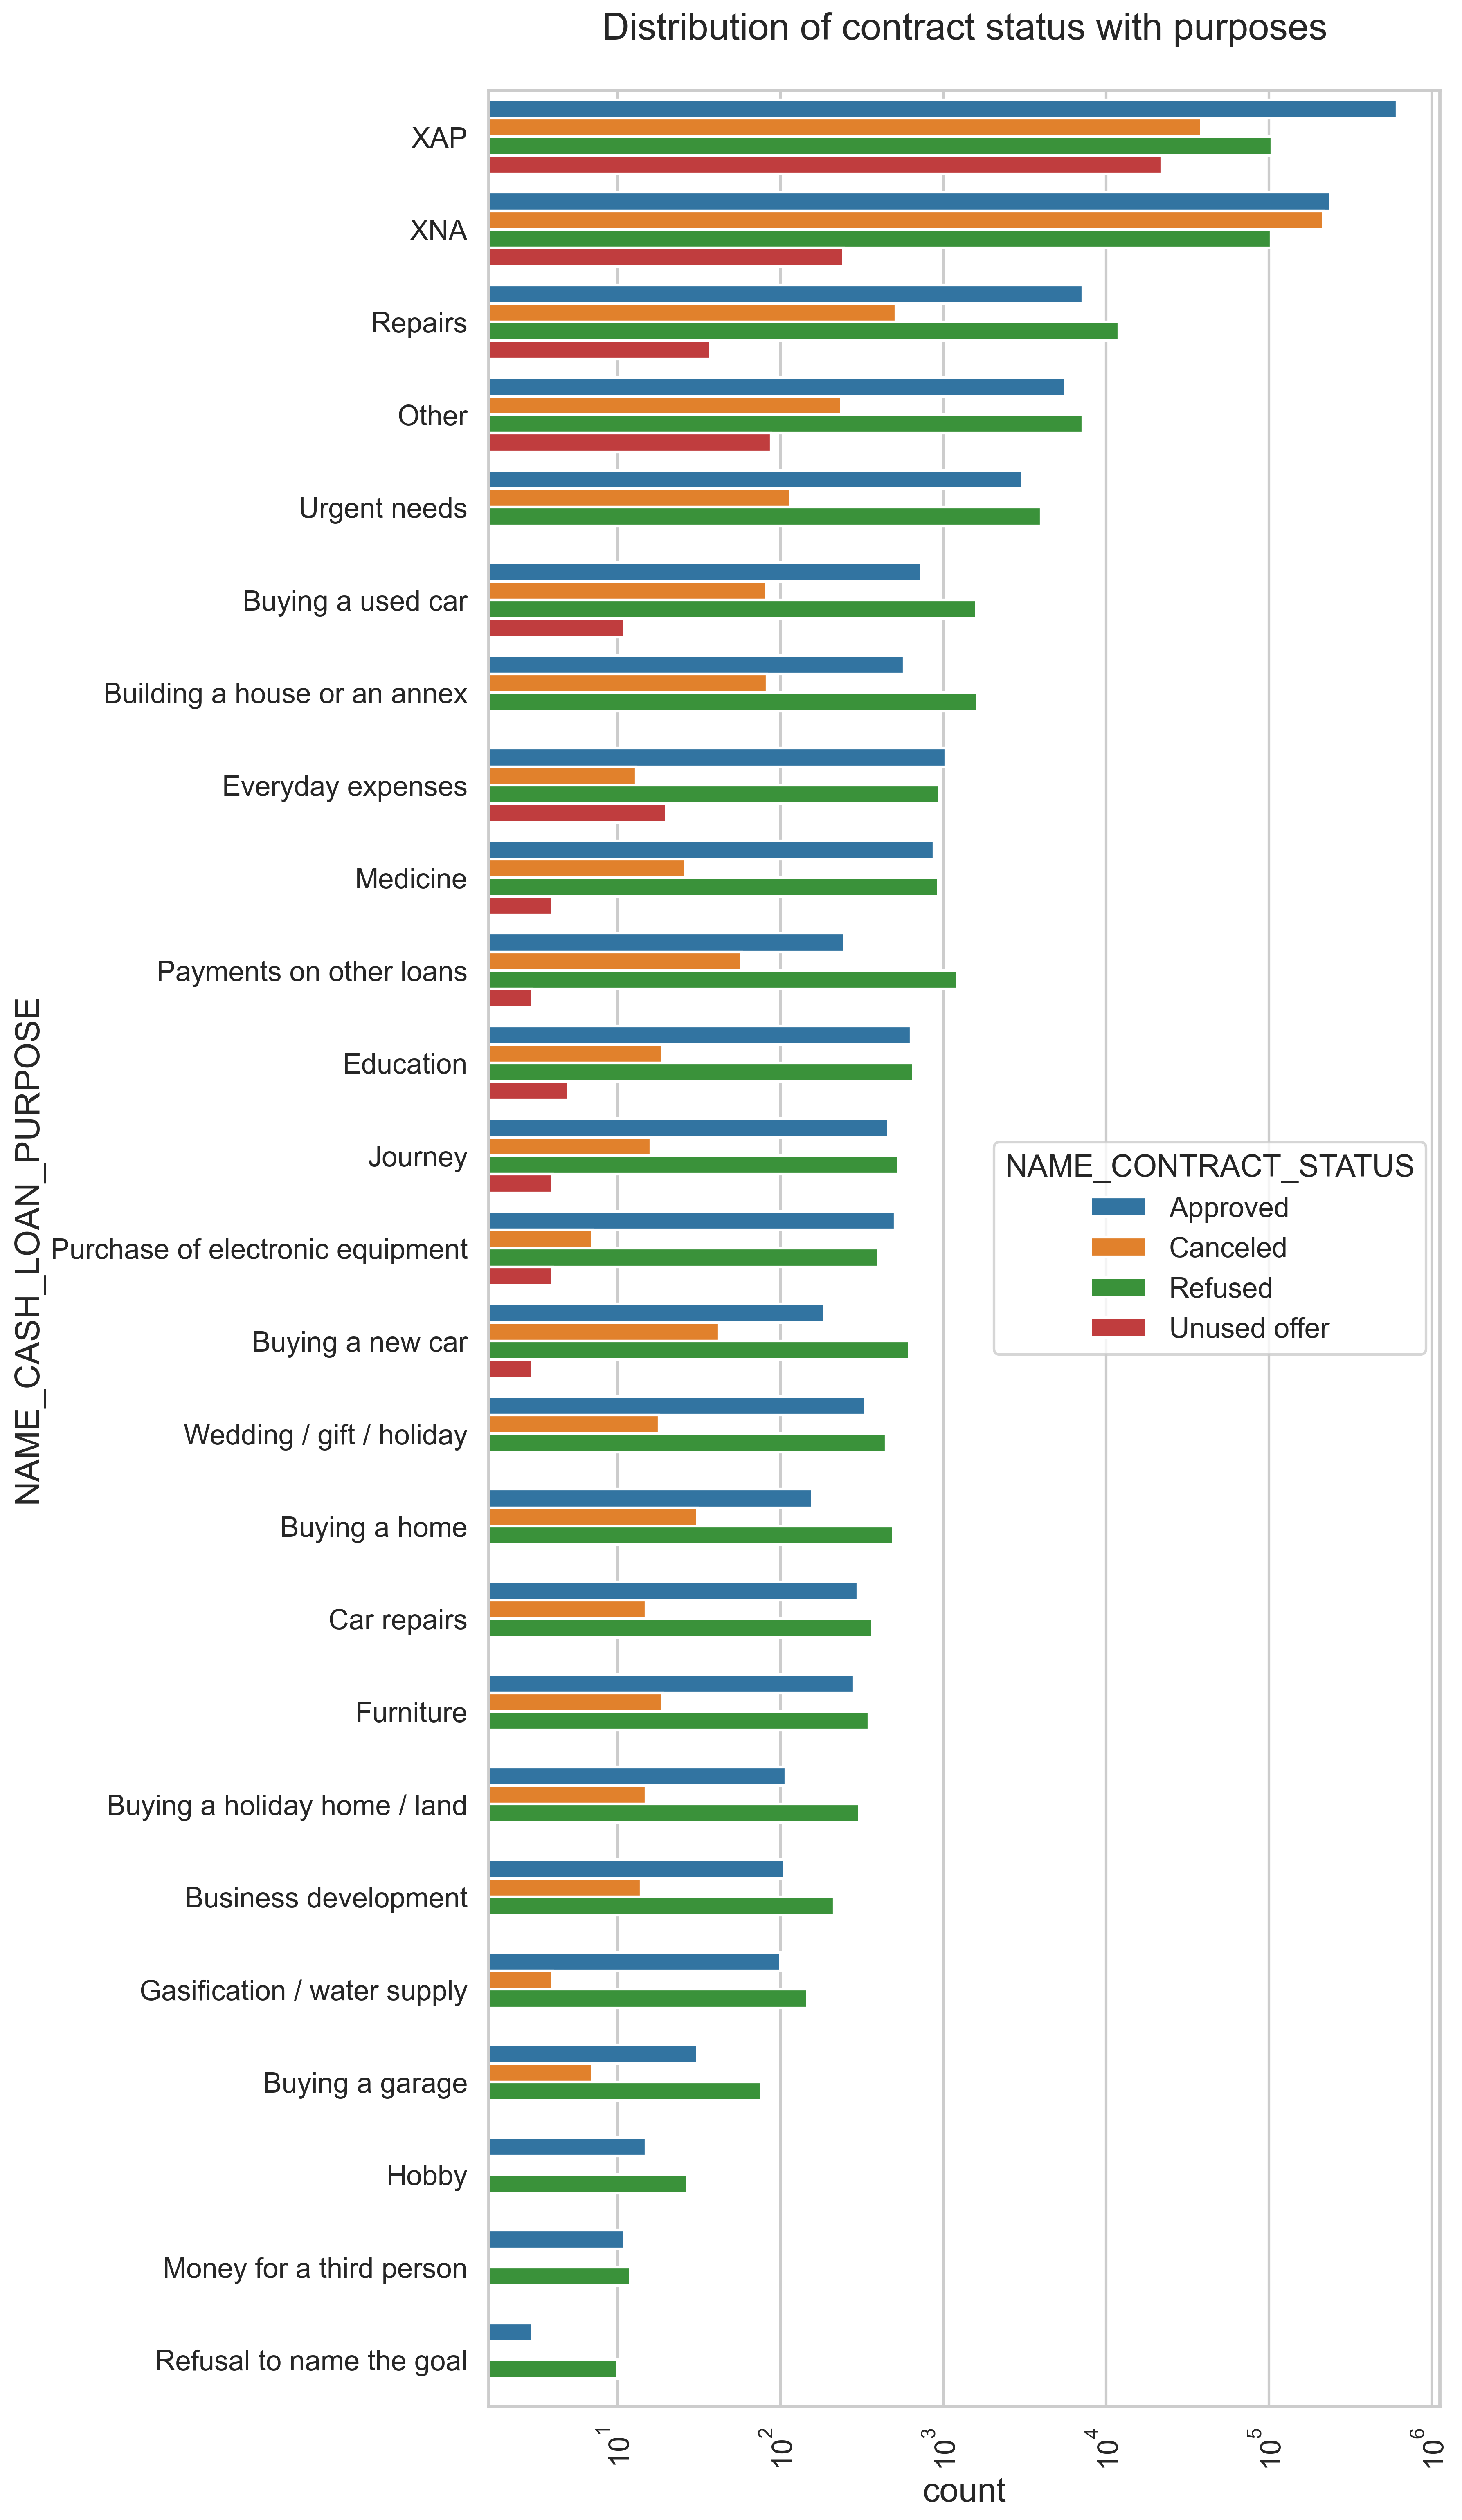

In [92]:
# Distribution of contract status in logarithmic scale
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = all_application, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=all_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

Most rejection of loans came from purpose 'repairs'. For education purposes we have equal number of approves and rejection Payign other loans and buying a new car is having significant higher rejection than approves.

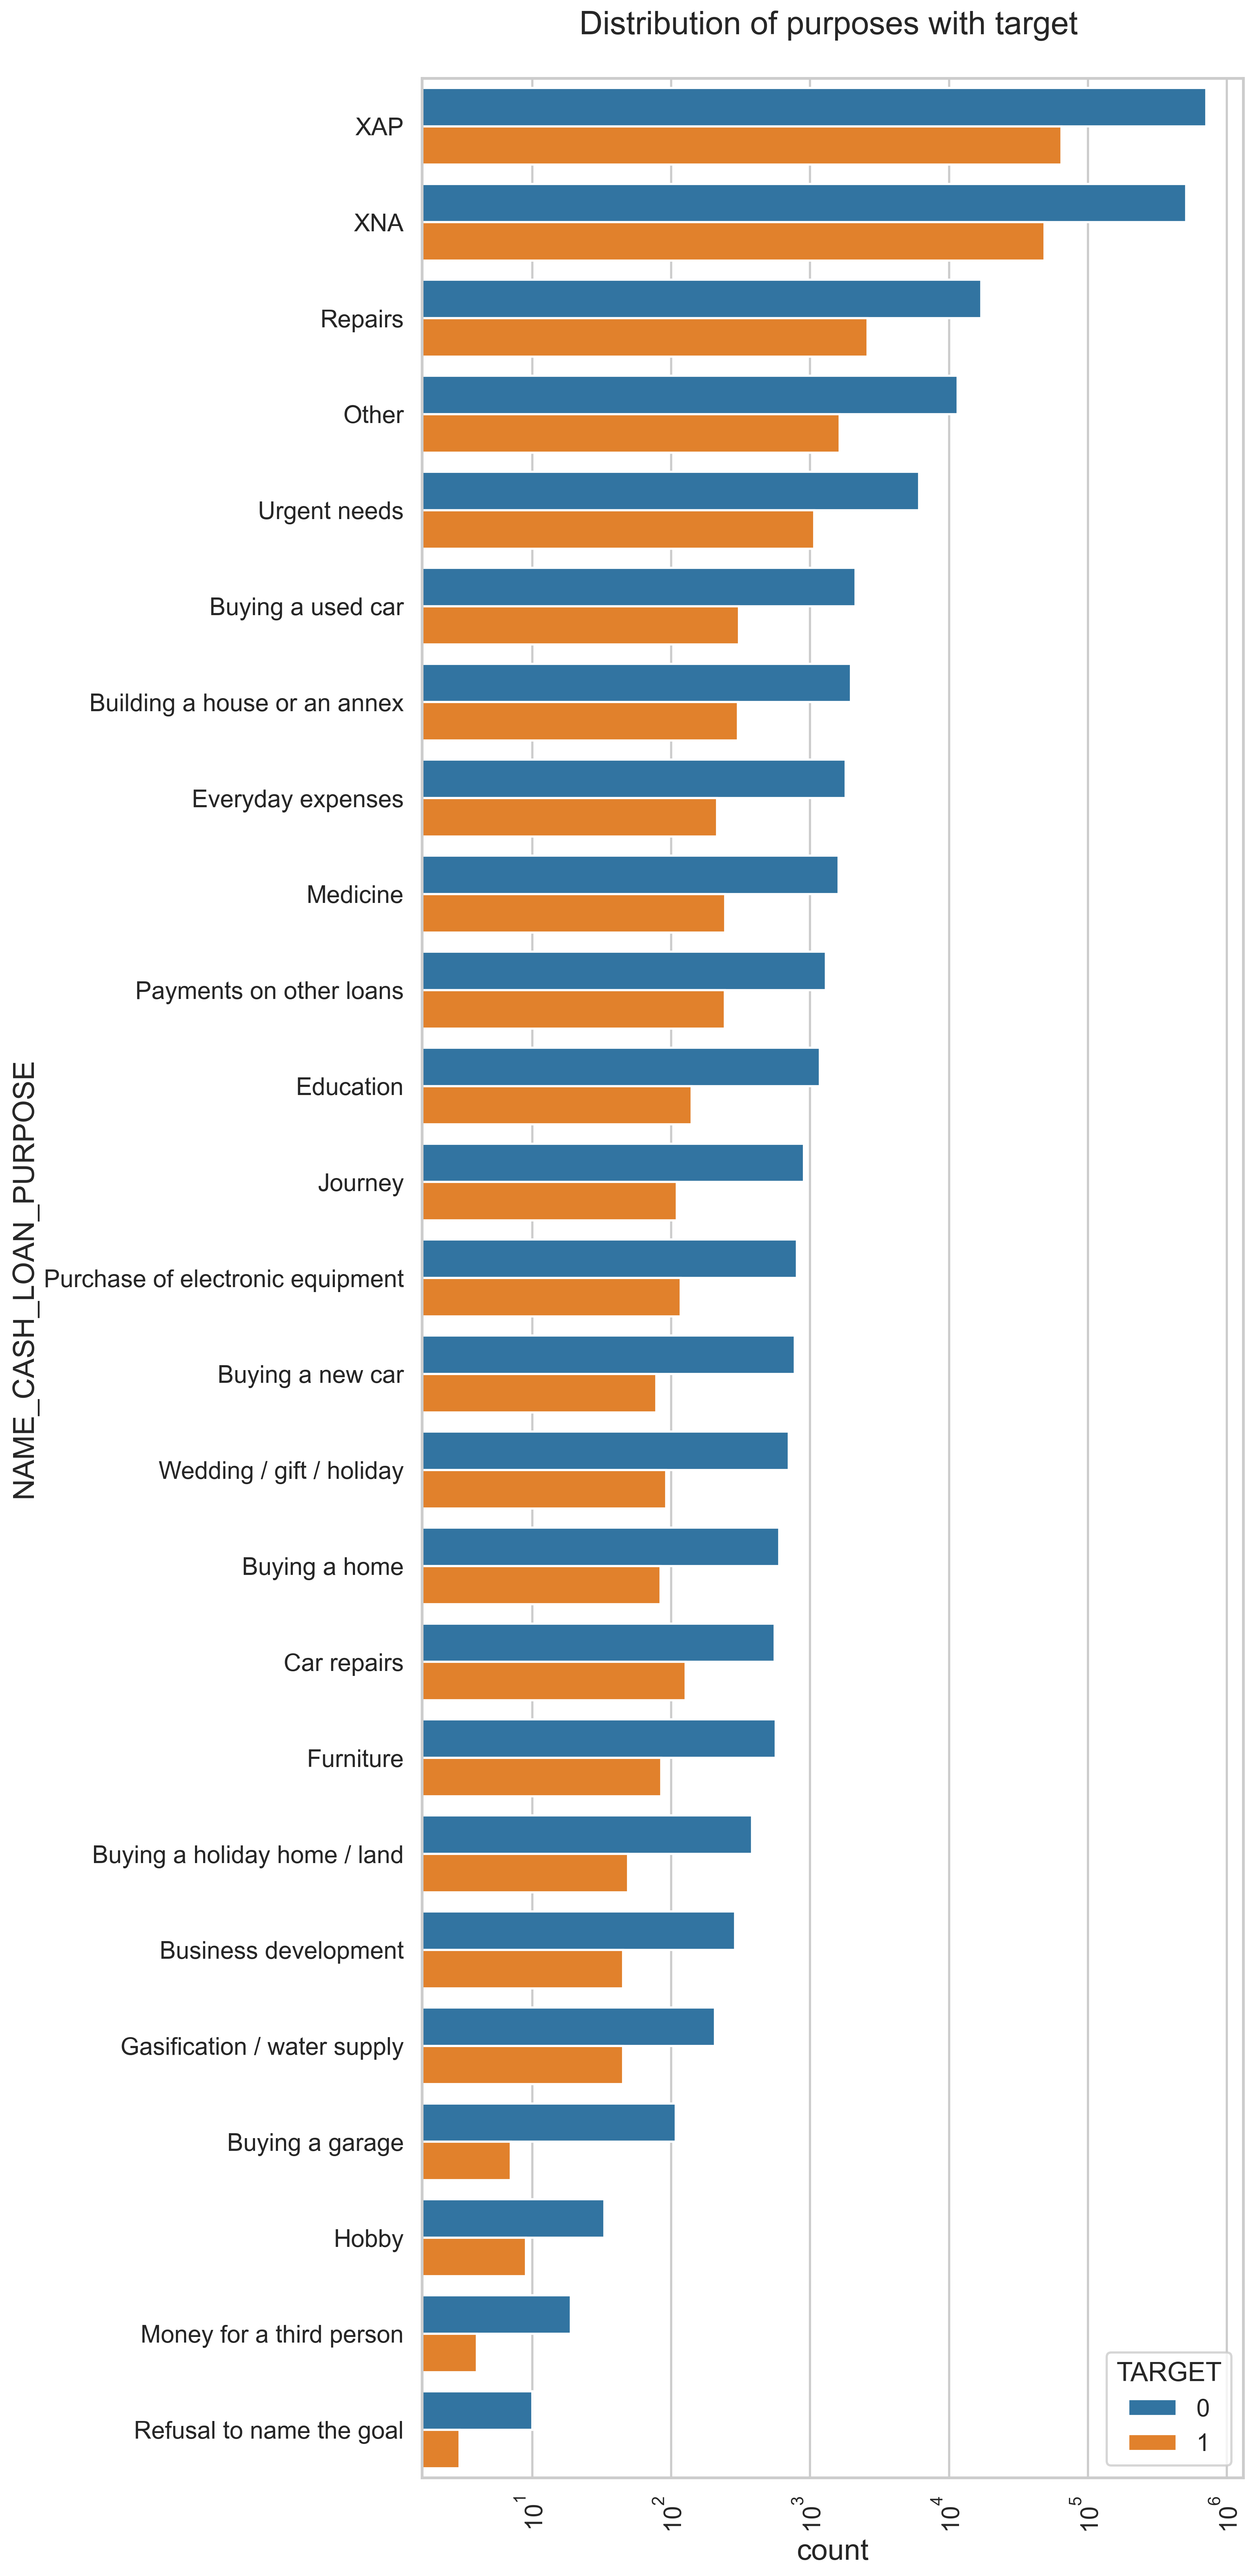

In [93]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,30),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = all_application, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=all_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

Loan purposes with 'Repairs' are facing more difficulites in payment on time. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

In [94]:
all_application.head()

Unnamed: 0  Unnamed: 0.1  TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
0           0             0       1         Cash loans           M   
1           1             1       0         Cash loans           F   
2           1             1       0         Cash loans           F   
3           1             1       0         Cash loans           F   
4           2             2       0    Revolving loans           M   

  FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0            N               Y             0          202500.0    406597.5   
1            N               N             0          270000.0   1293502.5   
2            N               N             0          270000.0   1293502.5   
3            N               N             0          270000.0   1293502.5   
4            Y               Y             0           67500.0    135000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE_ NAME_TYPE_SUITE_ NAME_INCOME_TYPE  \
0      24700.5          351000.0    Unaccompanied          Working   
1      35698.5         1129500.0           Family    State servant   
2      35698.5         1129500.0           Family    State servant   
3      35698.5         1129500.0           Family    State servant   
4       6750.0          135000.0    Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE       ORGANIZATION_TYPE  \
0             2120        Laborers  Business Entity Type 3   
1              291      Core staff                  School   
2              291      Core staff                  School   
3              291      Core staff                  School   
4             2531        Laborers              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       1.0                       0.0                   828.0   
3                       1.0                       0.0                   828.0   
4                       0.0                       0.0                   815.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2         

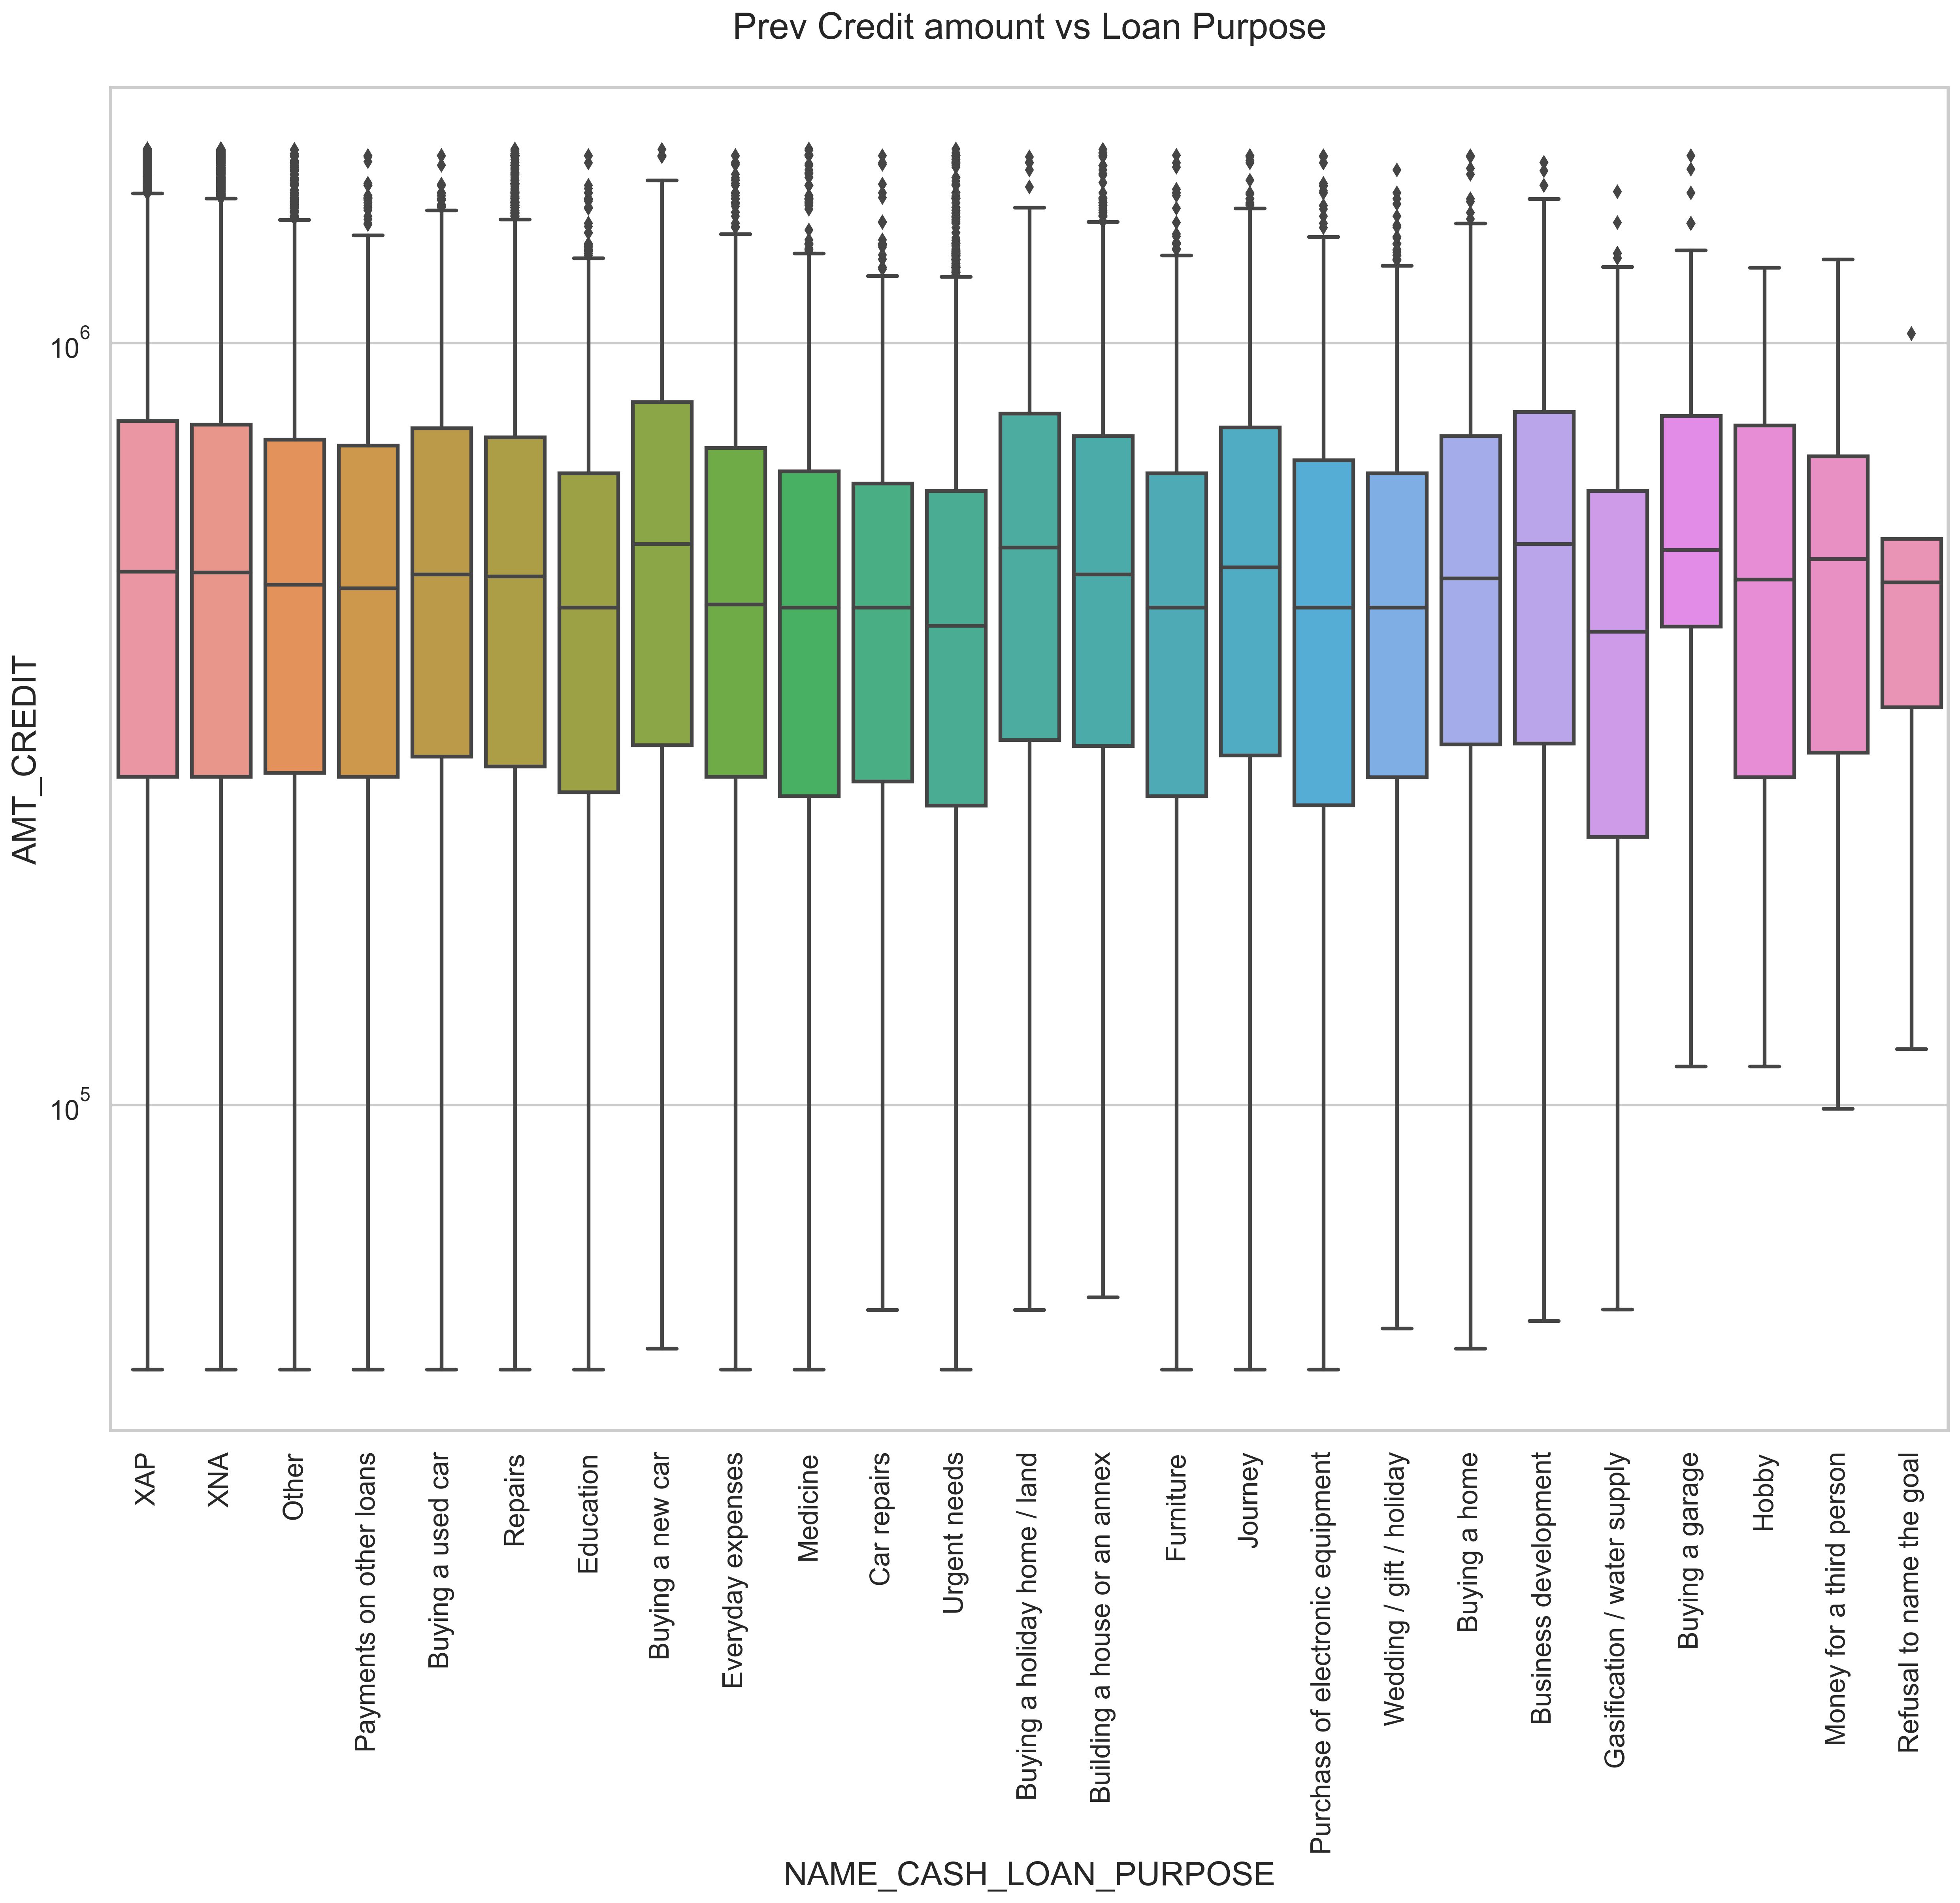

In [95]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,15),dpi = 300)
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =all_application, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher

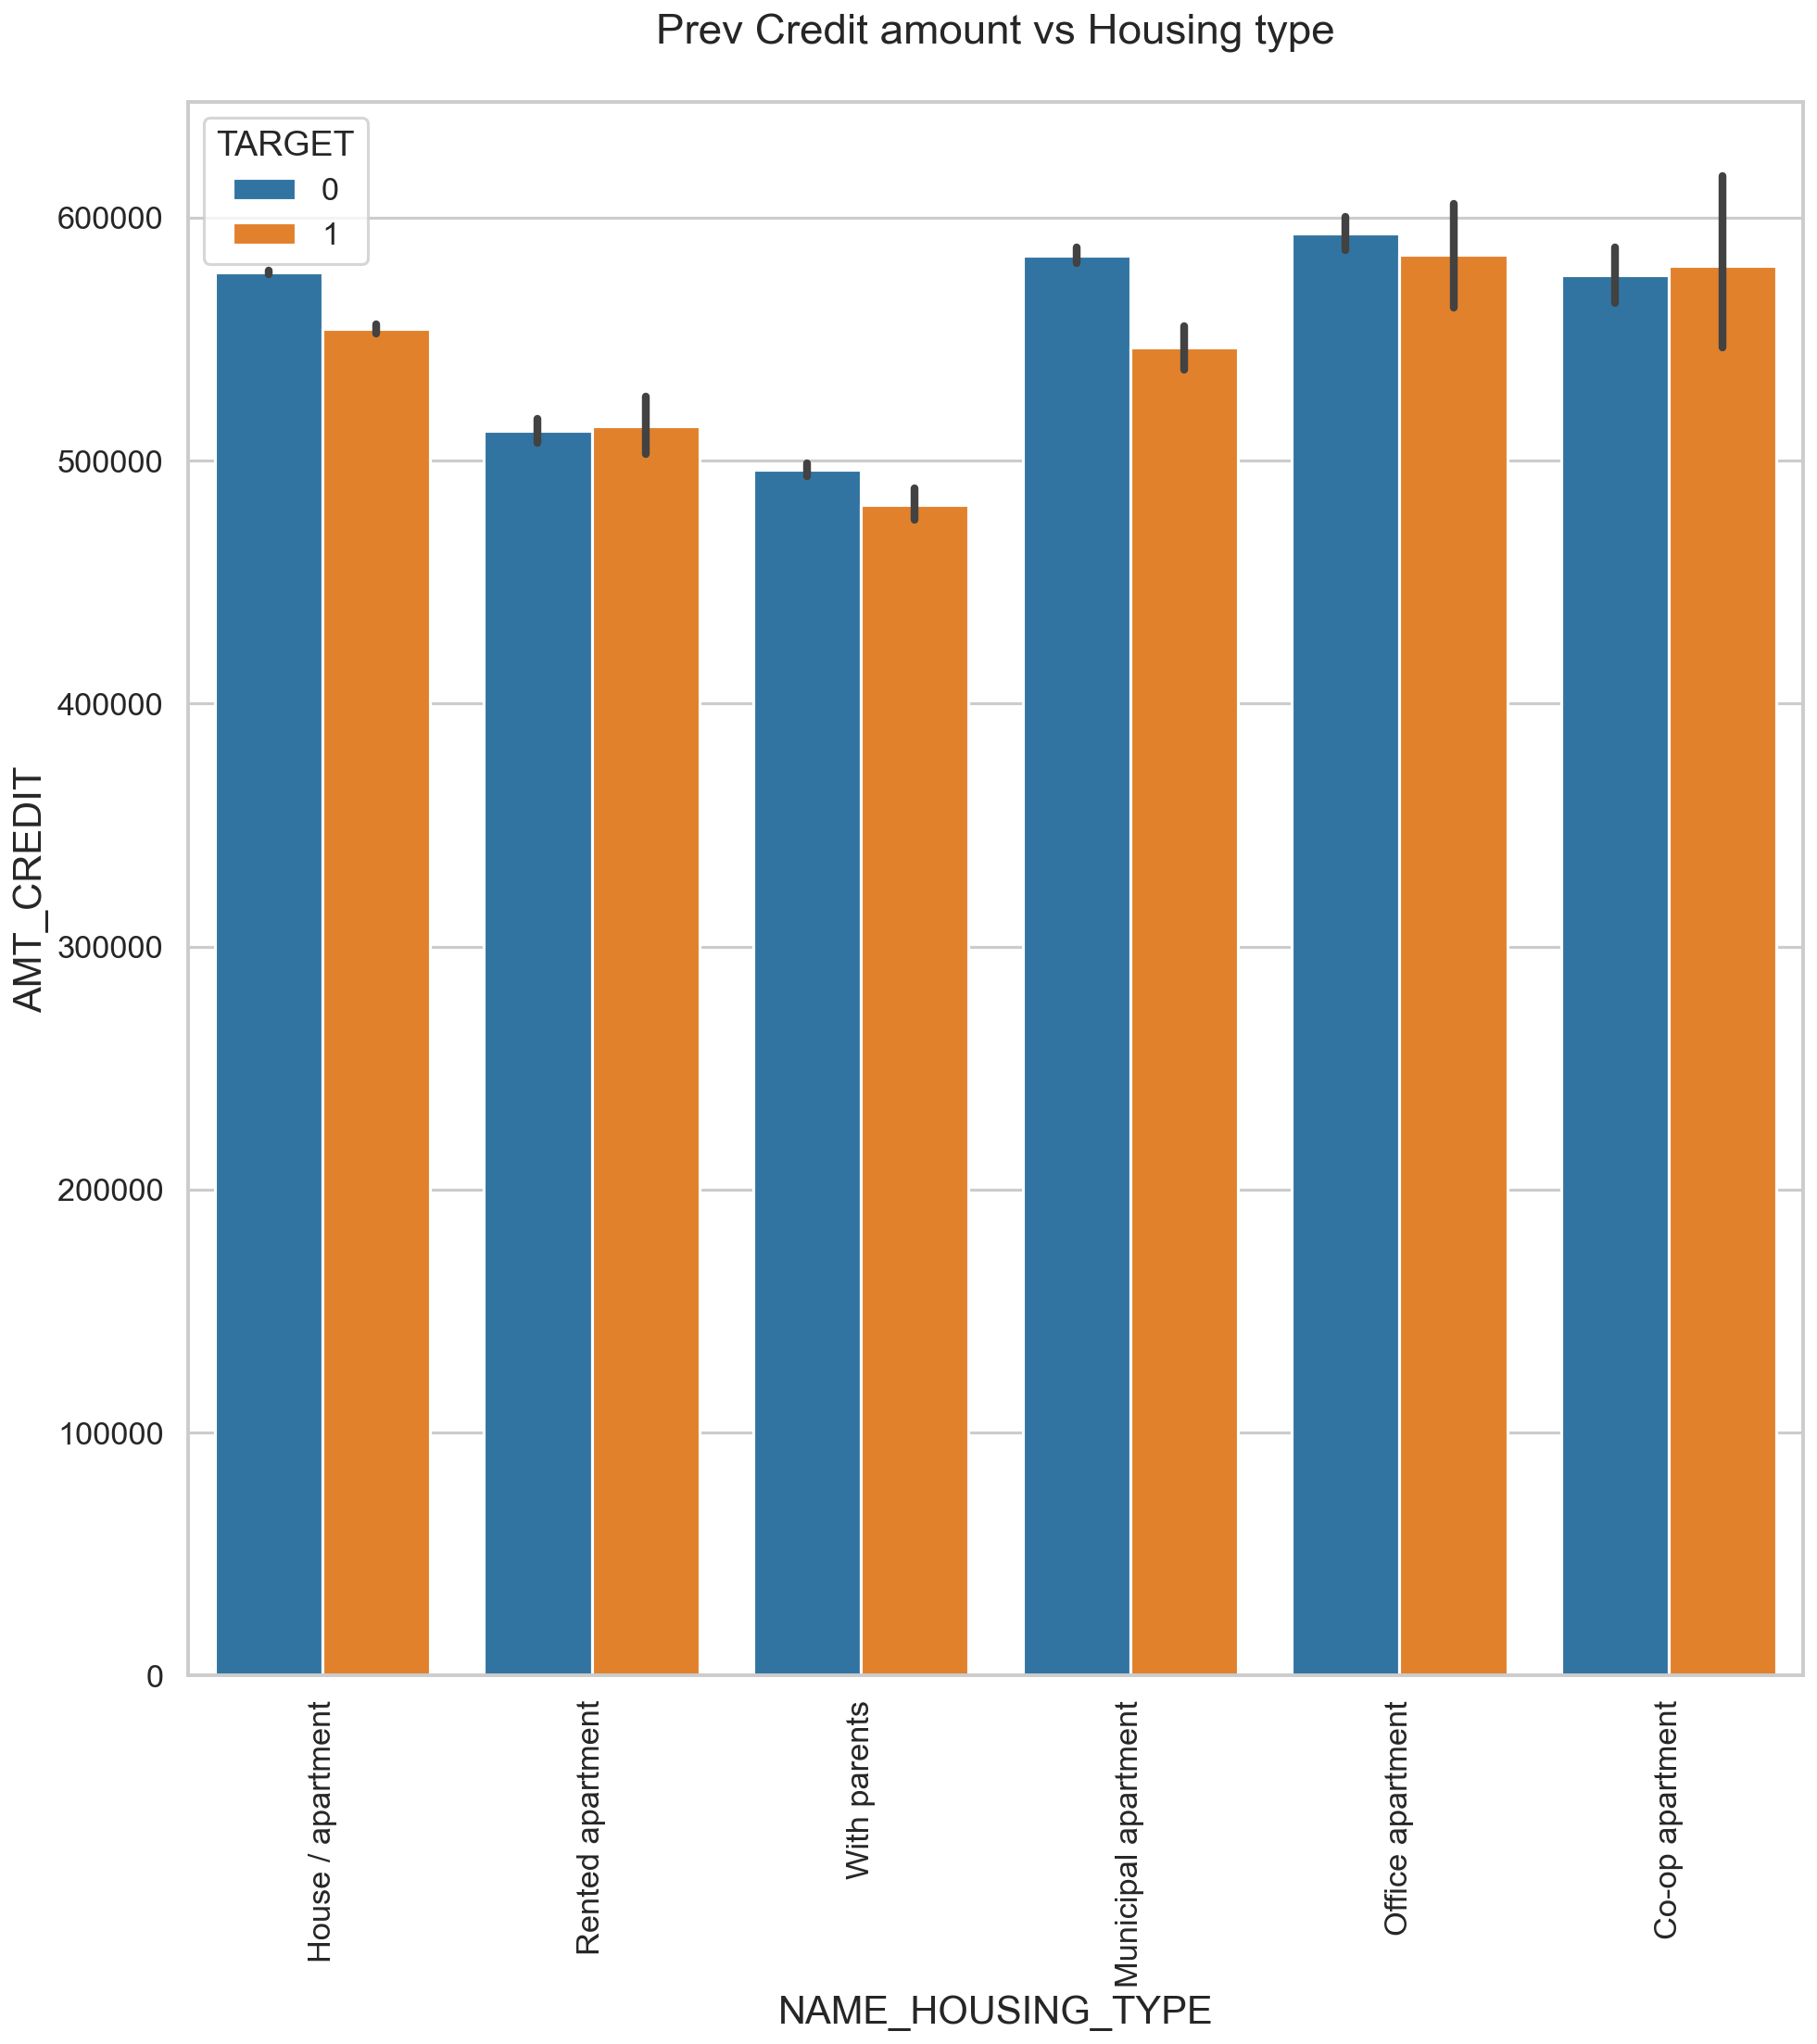

In [96]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(15,15),dpi = 150)
plt.xticks(rotation=90)
sns.barplot(data =all_application, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

In [97]:
all_application.to_csv('AllApplication')

# CONCLUSION

1:Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

4. Bank can focus mostly on housing type ‘with parents’ , ‘House\apartment’ and ‘municipal apartment’ for successful payments.
5. Although having higher number of rejection in loan purposes with 'Repairs' there are observed difficulties in payment on time./Bank should keep continue to caution while giving loan for this purpose.

# Regression Analysis

Label_encoding

In [98]:
from sklearn.preprocessing import LabelEncoder
cols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_YIELD_GROUP']

for col in cols:
    all_application[col]=LabelEncoder().fit_transform(all_application[col])

In [99]:
# Converting 'negative' values into 'positive' Values
all_application['DAYS_FIRST_DUE'] = all_application['DAYS_FIRST_DUE'].abs()
all_application['DAYS_LAST_DUE_1ST_VERSION'] = all_application['DAYS_LAST_DUE_1ST_VERSION'].abs()
all_application['DAYS_LAST_DUE'] = all_application['DAYS_LAST_DUE'].abs()
all_application['DAYS_TERMINATION'] = all_application['DAYS_TERMINATION'].abs()
all_application['DAYS_DECISION'] = all_application['DAYS_DECISION'].abs()

In [100]:
all_application.head()

Unnamed: 0  Unnamed: 0.1  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  \
0           0             0       1                   0            1   
1           1             1       0                   0            0   
2           1             1       0                   0            0   
3           1             1       0                   0            0   
4           2             2       0                   1            1   

   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0             0                1             0          202500.0    406597.5   
1             0                0             0          270000.0   1293502.5   
2             0                0             0          270000.0   1293502.5   
3             0                0             0          270000.0   1293502.5   
4             1                1             0           67500.0    135000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE_ NAME_TYPE_SUITE_  NAME_INCOME_TYPE  \
0      24700.5          351000.0    Unaccompanied                 6   
1      35698.5         1129500.0           Family                 3   
2      35698.5         1129500.0           Family                 3   
3      35698.5         1129500.0           Family                 3   
4       6750.0          135000.0    Unaccompanied                 6   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                    4                   3                  1   
1                    1                   1                  1   
2                    1                   1                  1   
3                    1                   1                  1   
4                    4                   3                  1   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE       ORGANIZATION_TYPE  \
0             2120        Laborers  Business Entity Type 3   
1              291      Core staff                  School   
2              291      Core staff                  School   
3              291      Core staff                  School   
4             2531        Laborers              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                  1134.0   
1                       1.0                       0.0                   828.0   
2                       1.0                       0.0                   828.0   
3                       1.0                       0.0                   828.0   
4                       0.0                       0.0                   815.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                       

In [101]:
all_application = all_application.replace(np.NaN, 0)

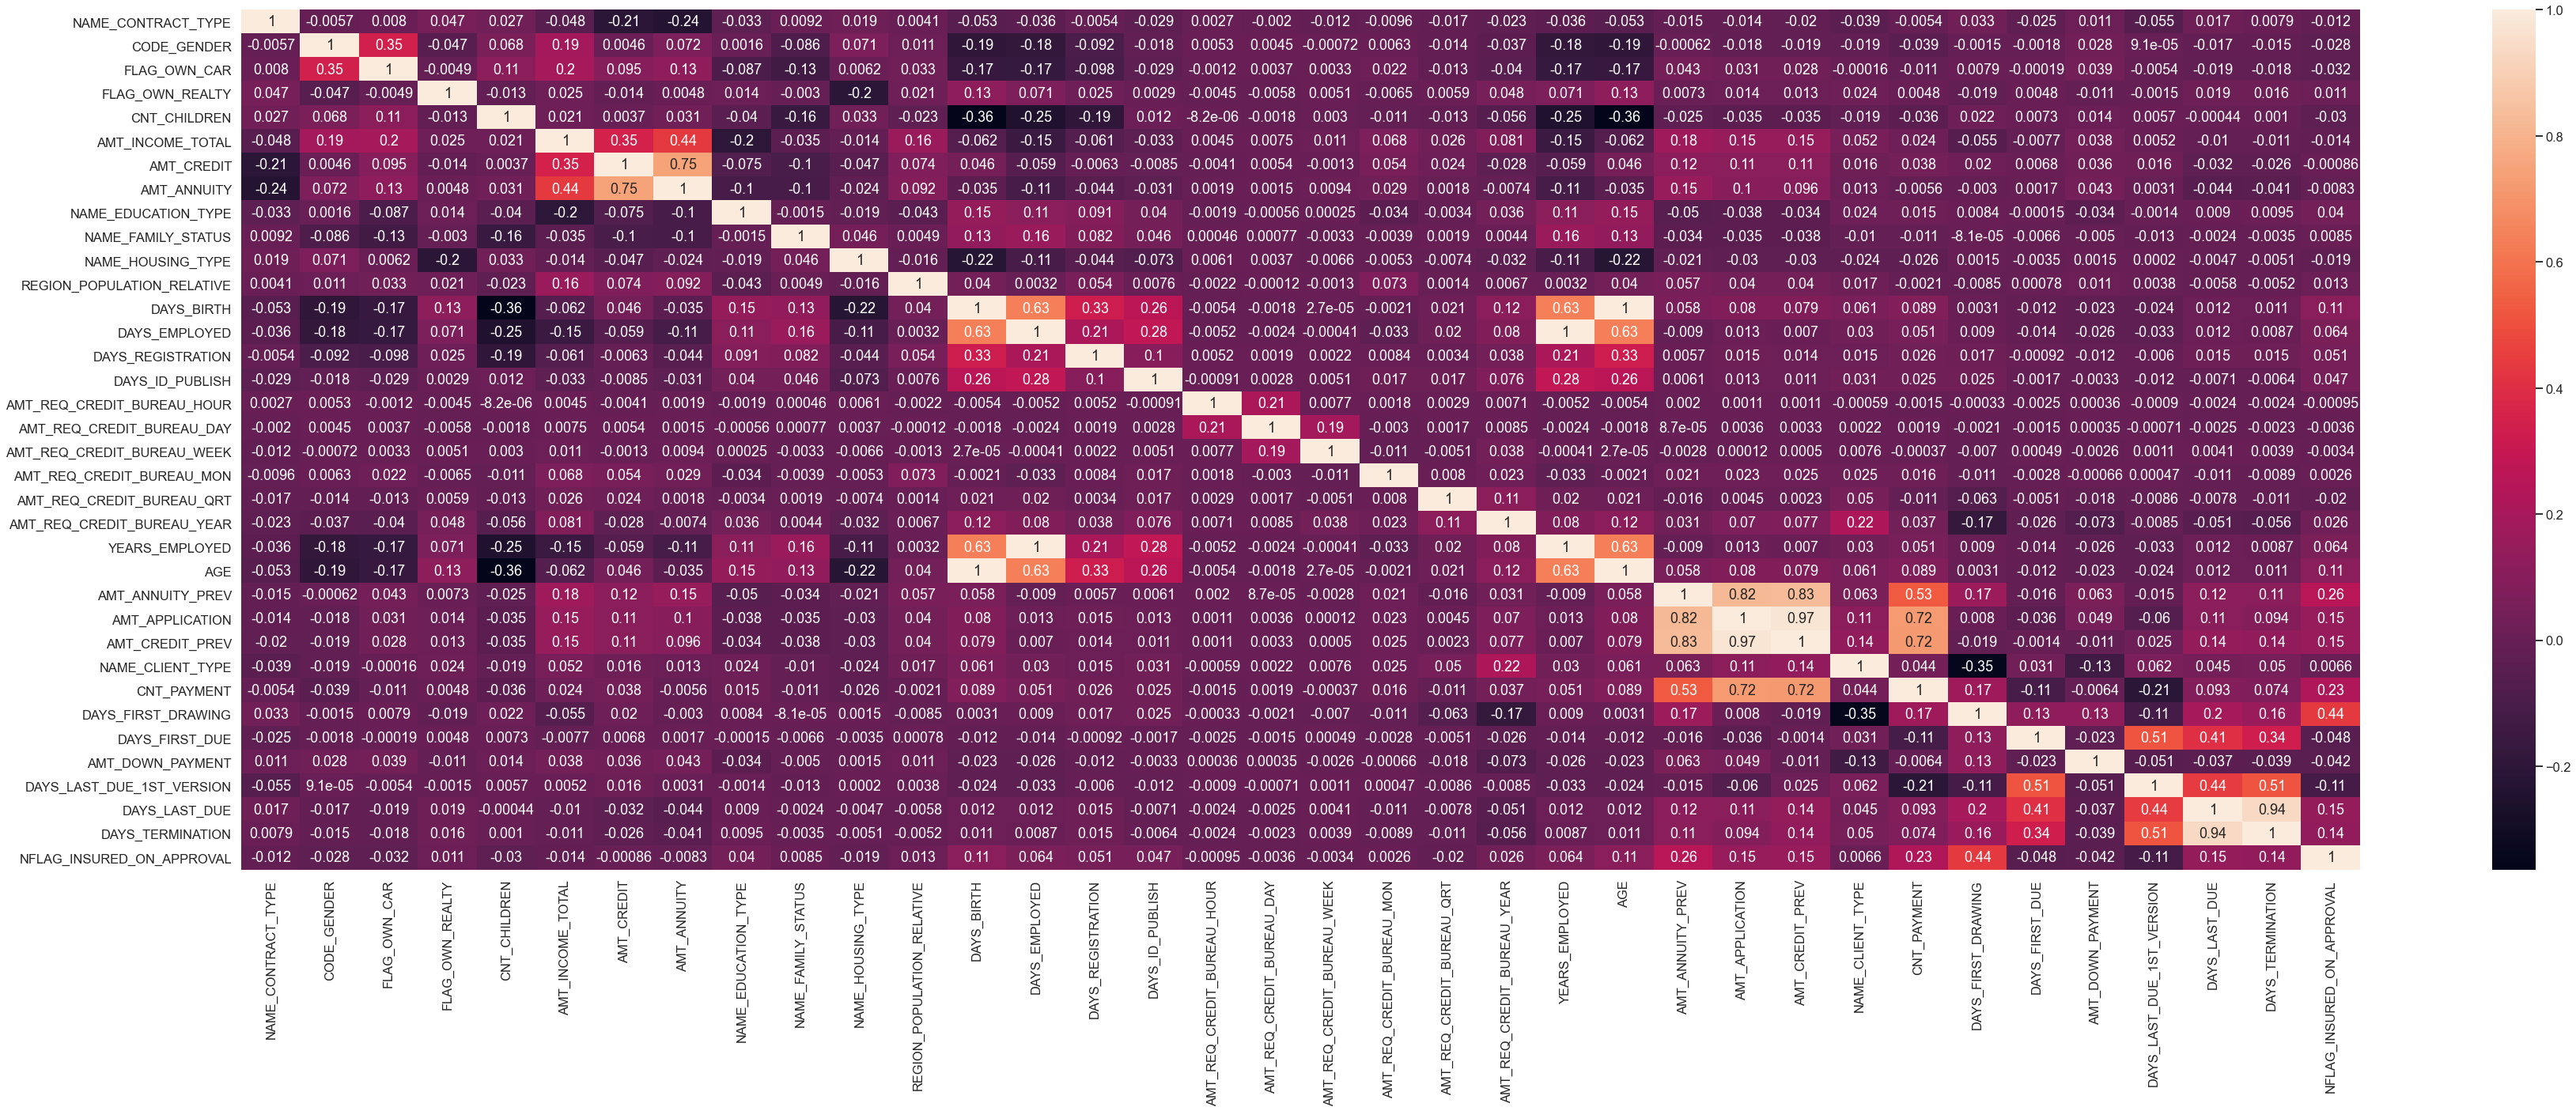

In [102]:
Variabels=all_application[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
                   'AMT_CREDIT','AMT_ANNUITY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                   'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                   'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_EMPLOYED','AGE','AMT_ANNUITY_PREV','AMT_APPLICATION',
                   'AMT_CREDIT_PREV','NAME_CLIENT_TYPE','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','AMT_DOWN_PAYMENT',
                   'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']]

plt.figure(figsize=(60,20))
sns.heatmap(Variabels.corr(),annot=True);
plt.savefig("heatmap.png")


In [103]:
all_application.to_csv('AllApplication2.csv')

Train Test

In [104]:
X= all_application[['CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','AMT_DOWN_PAYMENT','DAYS_LAST_DUE','DAYS_TERMINATION',
         'AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','NAME_CONTRACT_STATUS','NAME_FAMILY_STATUS','CODE_GENDER','CNT_CHILDREN',
'AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_PREV','AMT_APPLICATION','CNT_PAYMENT']]
y=all_application['TARGET']


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42)

Model Training

In [106]:
#Classify Function
from sklearn.model_selection import cross_val_score
def Classifier(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42)
    model.fit(X_train,y_train)
    print('accuracy is',model.score(X_test,y_test)*100)
    score=cross_val_score(model,X,y,cv=5)
    print('cross validation is,',np.mean(score)*100)

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
Classifier(model,X,y)

C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy is 91.289096250216


C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


cross validation is, 91.2993860516625


In [108]:
y_pred=model.predict(X_test)

In [109]:
print(model.coef_)

[[ 4.75531058e-08 -1.13734378e-06 -8.57237088e-07 -7.20287868e-06
   1.03653696e-06 -7.49545569e-07 -1.56364120e-07  8.96569893e-07
  -1.09420426e-04  4.64799900e-07 -9.56972214e-09 -1.22600249e-08
   3.64295808e-09 -5.39793477e-09 -1.89965927e-06 -2.30247552e-10
  -1.96401228e-08 -7.31103355e-06  3.35294087e-07  4.75531058e-08]]


In [110]:
from sklearn.metrics import confusion_matrix

Training the Random Forest model

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = RandomForestClassifier(n_estimators=600)

In [113]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [114]:
predictions = rfc.predict(X_test)#prediction and evaluation

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    316974
           1       1.00      0.30      0.46     30246

    accuracy                           0.94    347220
   macro avg       0.97      0.65      0.71    347220
weighted avg       0.94      0.94      0.92    347220



In [117]:
print(confusion_matrix(y_test,predictions))

[[316972      2]
 [ 21317   8929]]


NameError: name 'clf' is not defined